# About this Jupyter Notebook

This Jupyter Notebook should help you to understand, how to work with the different DCR Graph data structures and how to apply the OCDisCoveR algorithm on logs. It is supposed to be used in addition to the user manual and documentation. All the examples are exemplary and focus on the use of the different functions,

# (OC-)DCR Graphs

**Caution**: All examples provided, especially in this subsection, are illustrative and focus primarily on demonstration the use of the library, rather than guaranteeing semantically correct or complete DCR models.

## Import of Modules
First of all, the necessary classes have to be imported from the `ocpa.objects.oc_dcr_graph` module

In [1]:
try:
    import ocpa as ocpa
    from ocpa.objects.oc_dcr_graph import DCRGraph, OCDCRGraph, RelationTyps, MarkingTyps, OCDCRObject, Event

    # Needed for visualization
    import ocpa.visualization.oc_dcr_vis as dcr_vis

    # Needed for Jupyter Notebook
    from IPython.display import display, Markdown
except Exception as e:
    display("Something went wrong")
else:
    display("Everything worked!")

'Everything worked!'

## Data Structure

We create a basic DCR Graph and add five events:
- `Event1` is pending and included
- `Event2` is a nested group activity
- `Event3` and `Event5` are sub-activities of `Event2`
- `Event4`


And add the following constraints:
- `Event1` is a condition for `Event2`
- `Event3` is a response to `Event1`
- `Event3` includes `Event5`
- `Event1` excludes `Event4`

In [2]:
dcr = DCRGraph()

dcr.add_event('Event1', marking={MarkingTyps.P, MarkingTyps.I})
dcr.add_event('Event2', isGroup=True)
dcr.add_event('Event3', parent='Event2')
dcr.add_event('Event4')
dcr.add_event('Event5', parent='Event2')

dcr.add_relation('Event1', 'Event2', RelationTyps.C)
dcr.add_relation('Event1', 'Event3', RelationTyps.R)
dcr.add_relation('Event3', 'Event5', RelationTyps.I)
dcr.add_relation('Event1', 'Event4', RelationTyps.E)


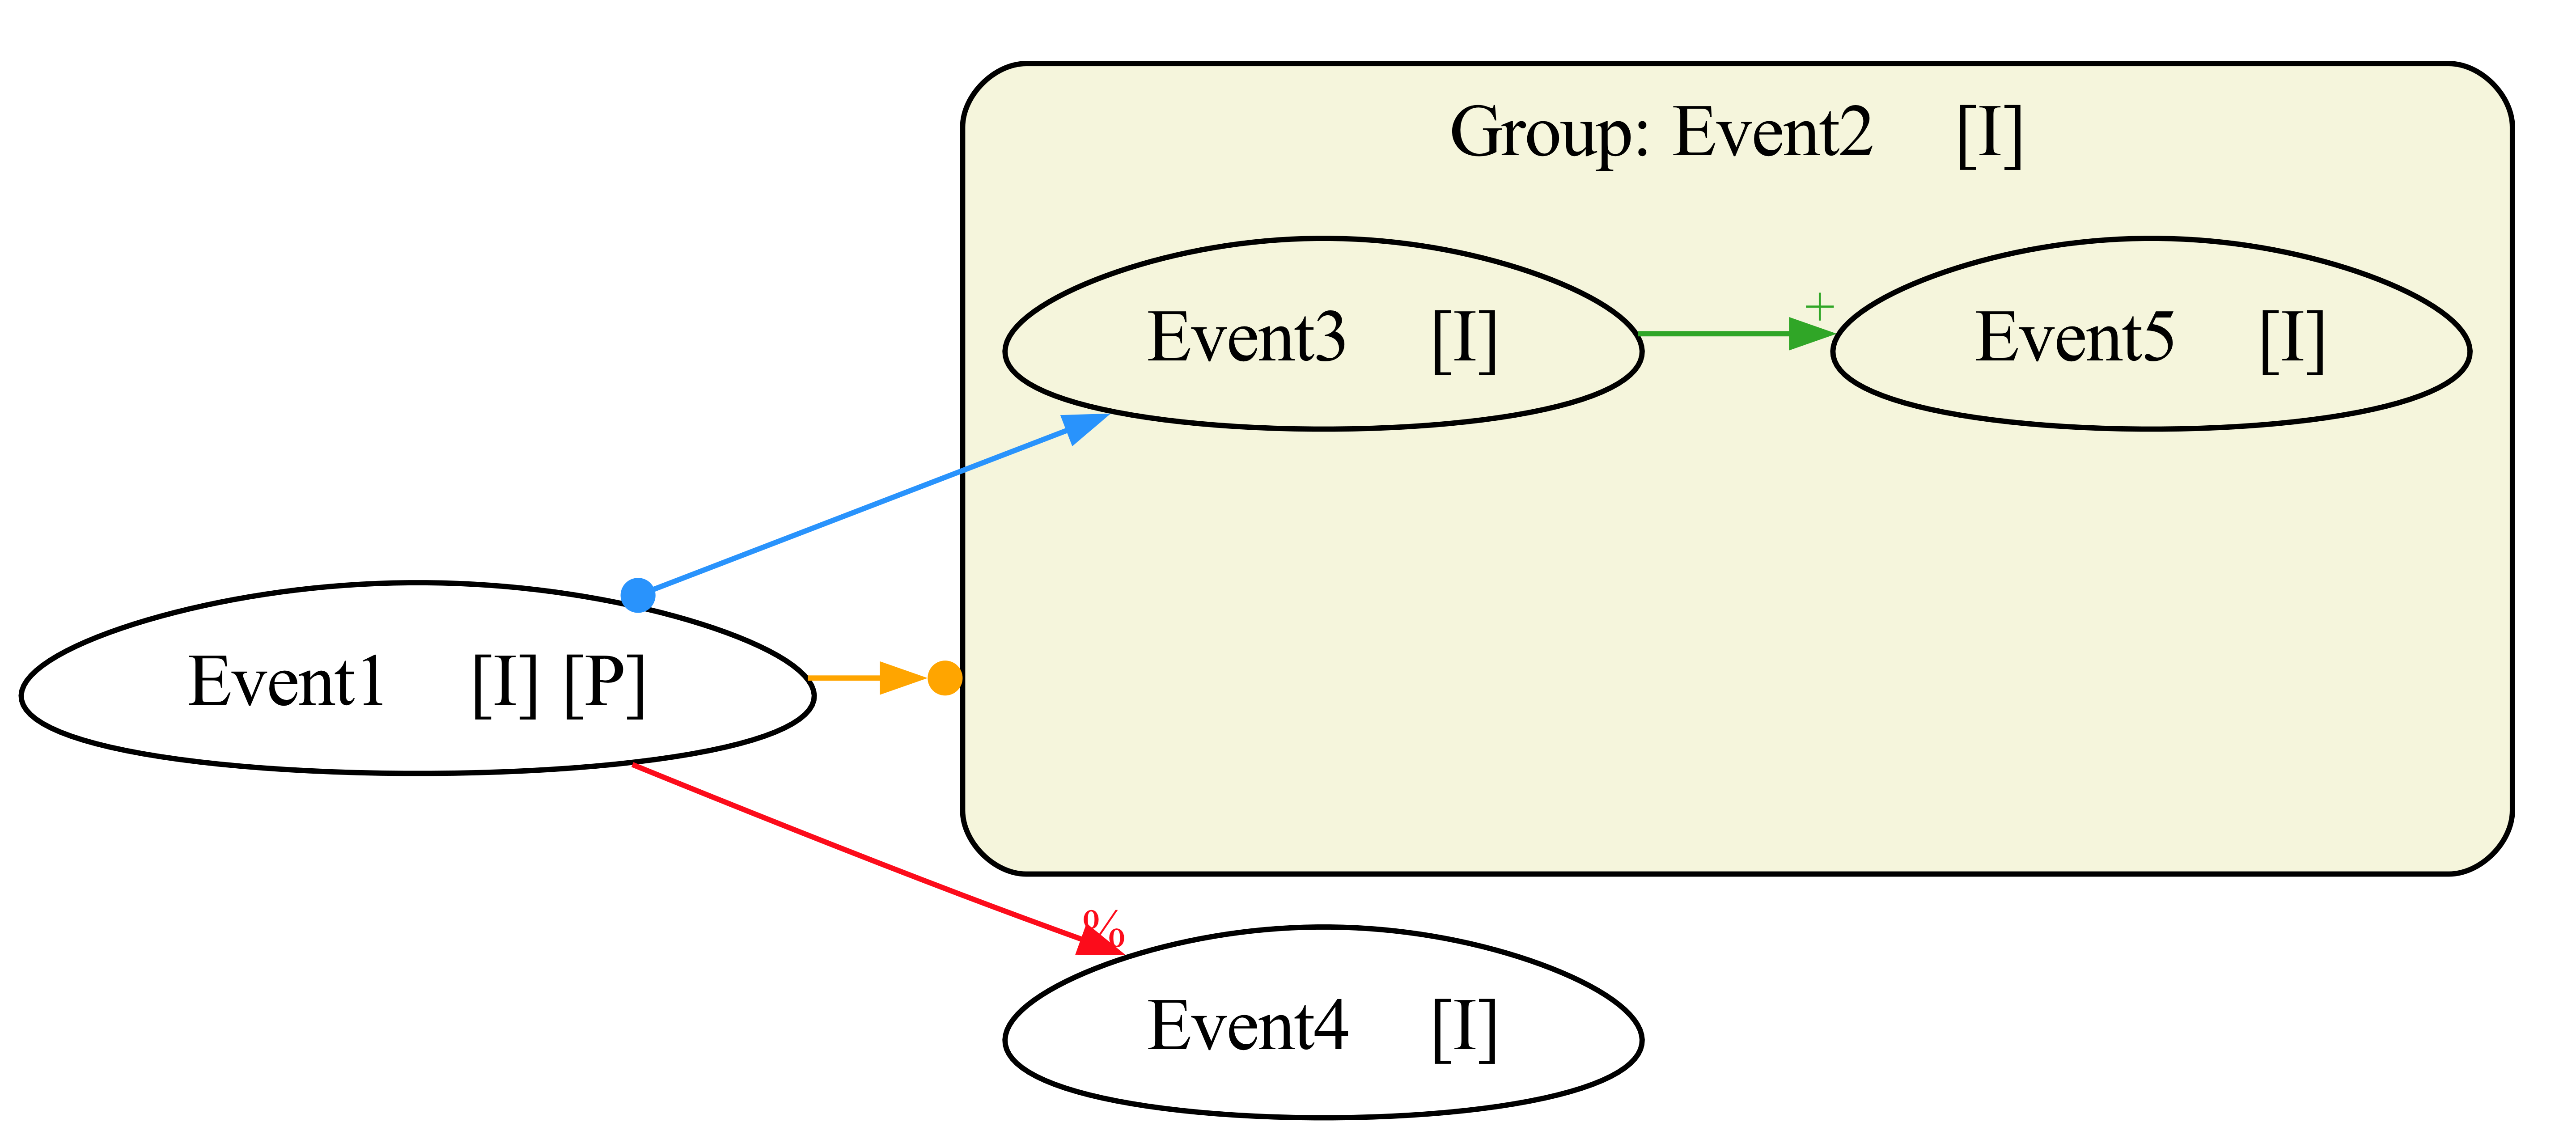

In [3]:
# Visualisation
dcr_vis.view(dcr_vis.apply(dcr))

We use the current DCR Graph as a starting point for an objejct-centric DCR Graph.

In [4]:
ocdcr = OCDCRGraph(dcr=dcr)

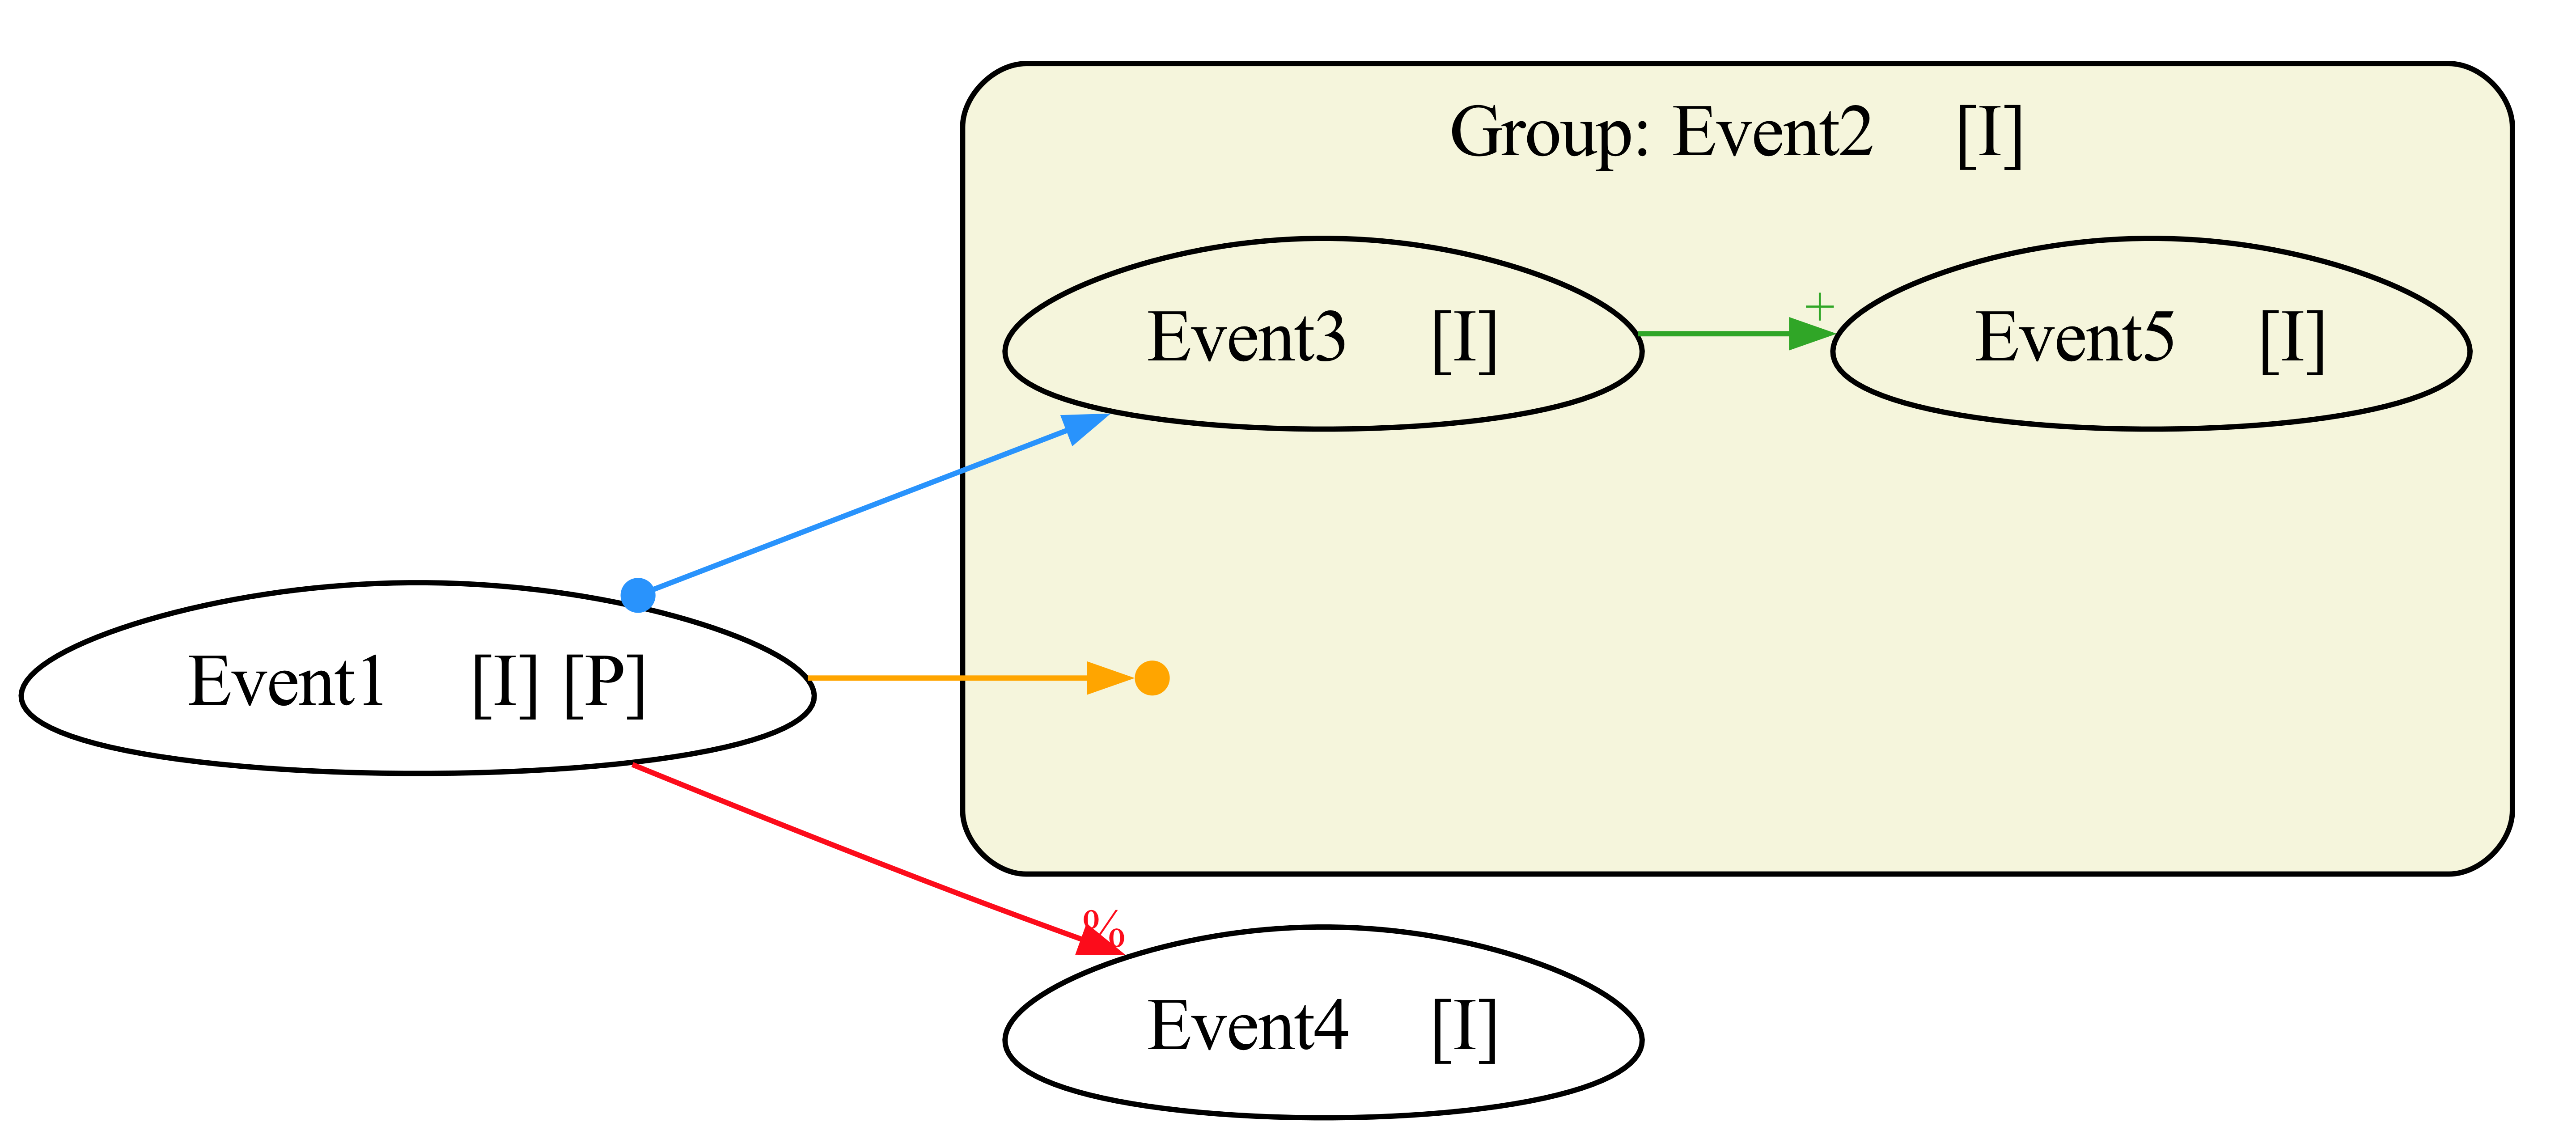

In [5]:
# Visualisation
dcr_vis.view(dcr_vis.apply(ocdcr))

Then we create an object type and add it to the OC-DCR Graph

In [6]:
spawn_event = Event('Create_Obj1')
object = OCDCRObject(spawn=spawn_event, type='Object1')

object.add_event('OBJ_Event1')
object.add_event('OBJ_Event2')

object.add_relation('OBJ_Event1', 'OBJ_Event2', RelationTyps.C)

ocdcr.add_object(object)

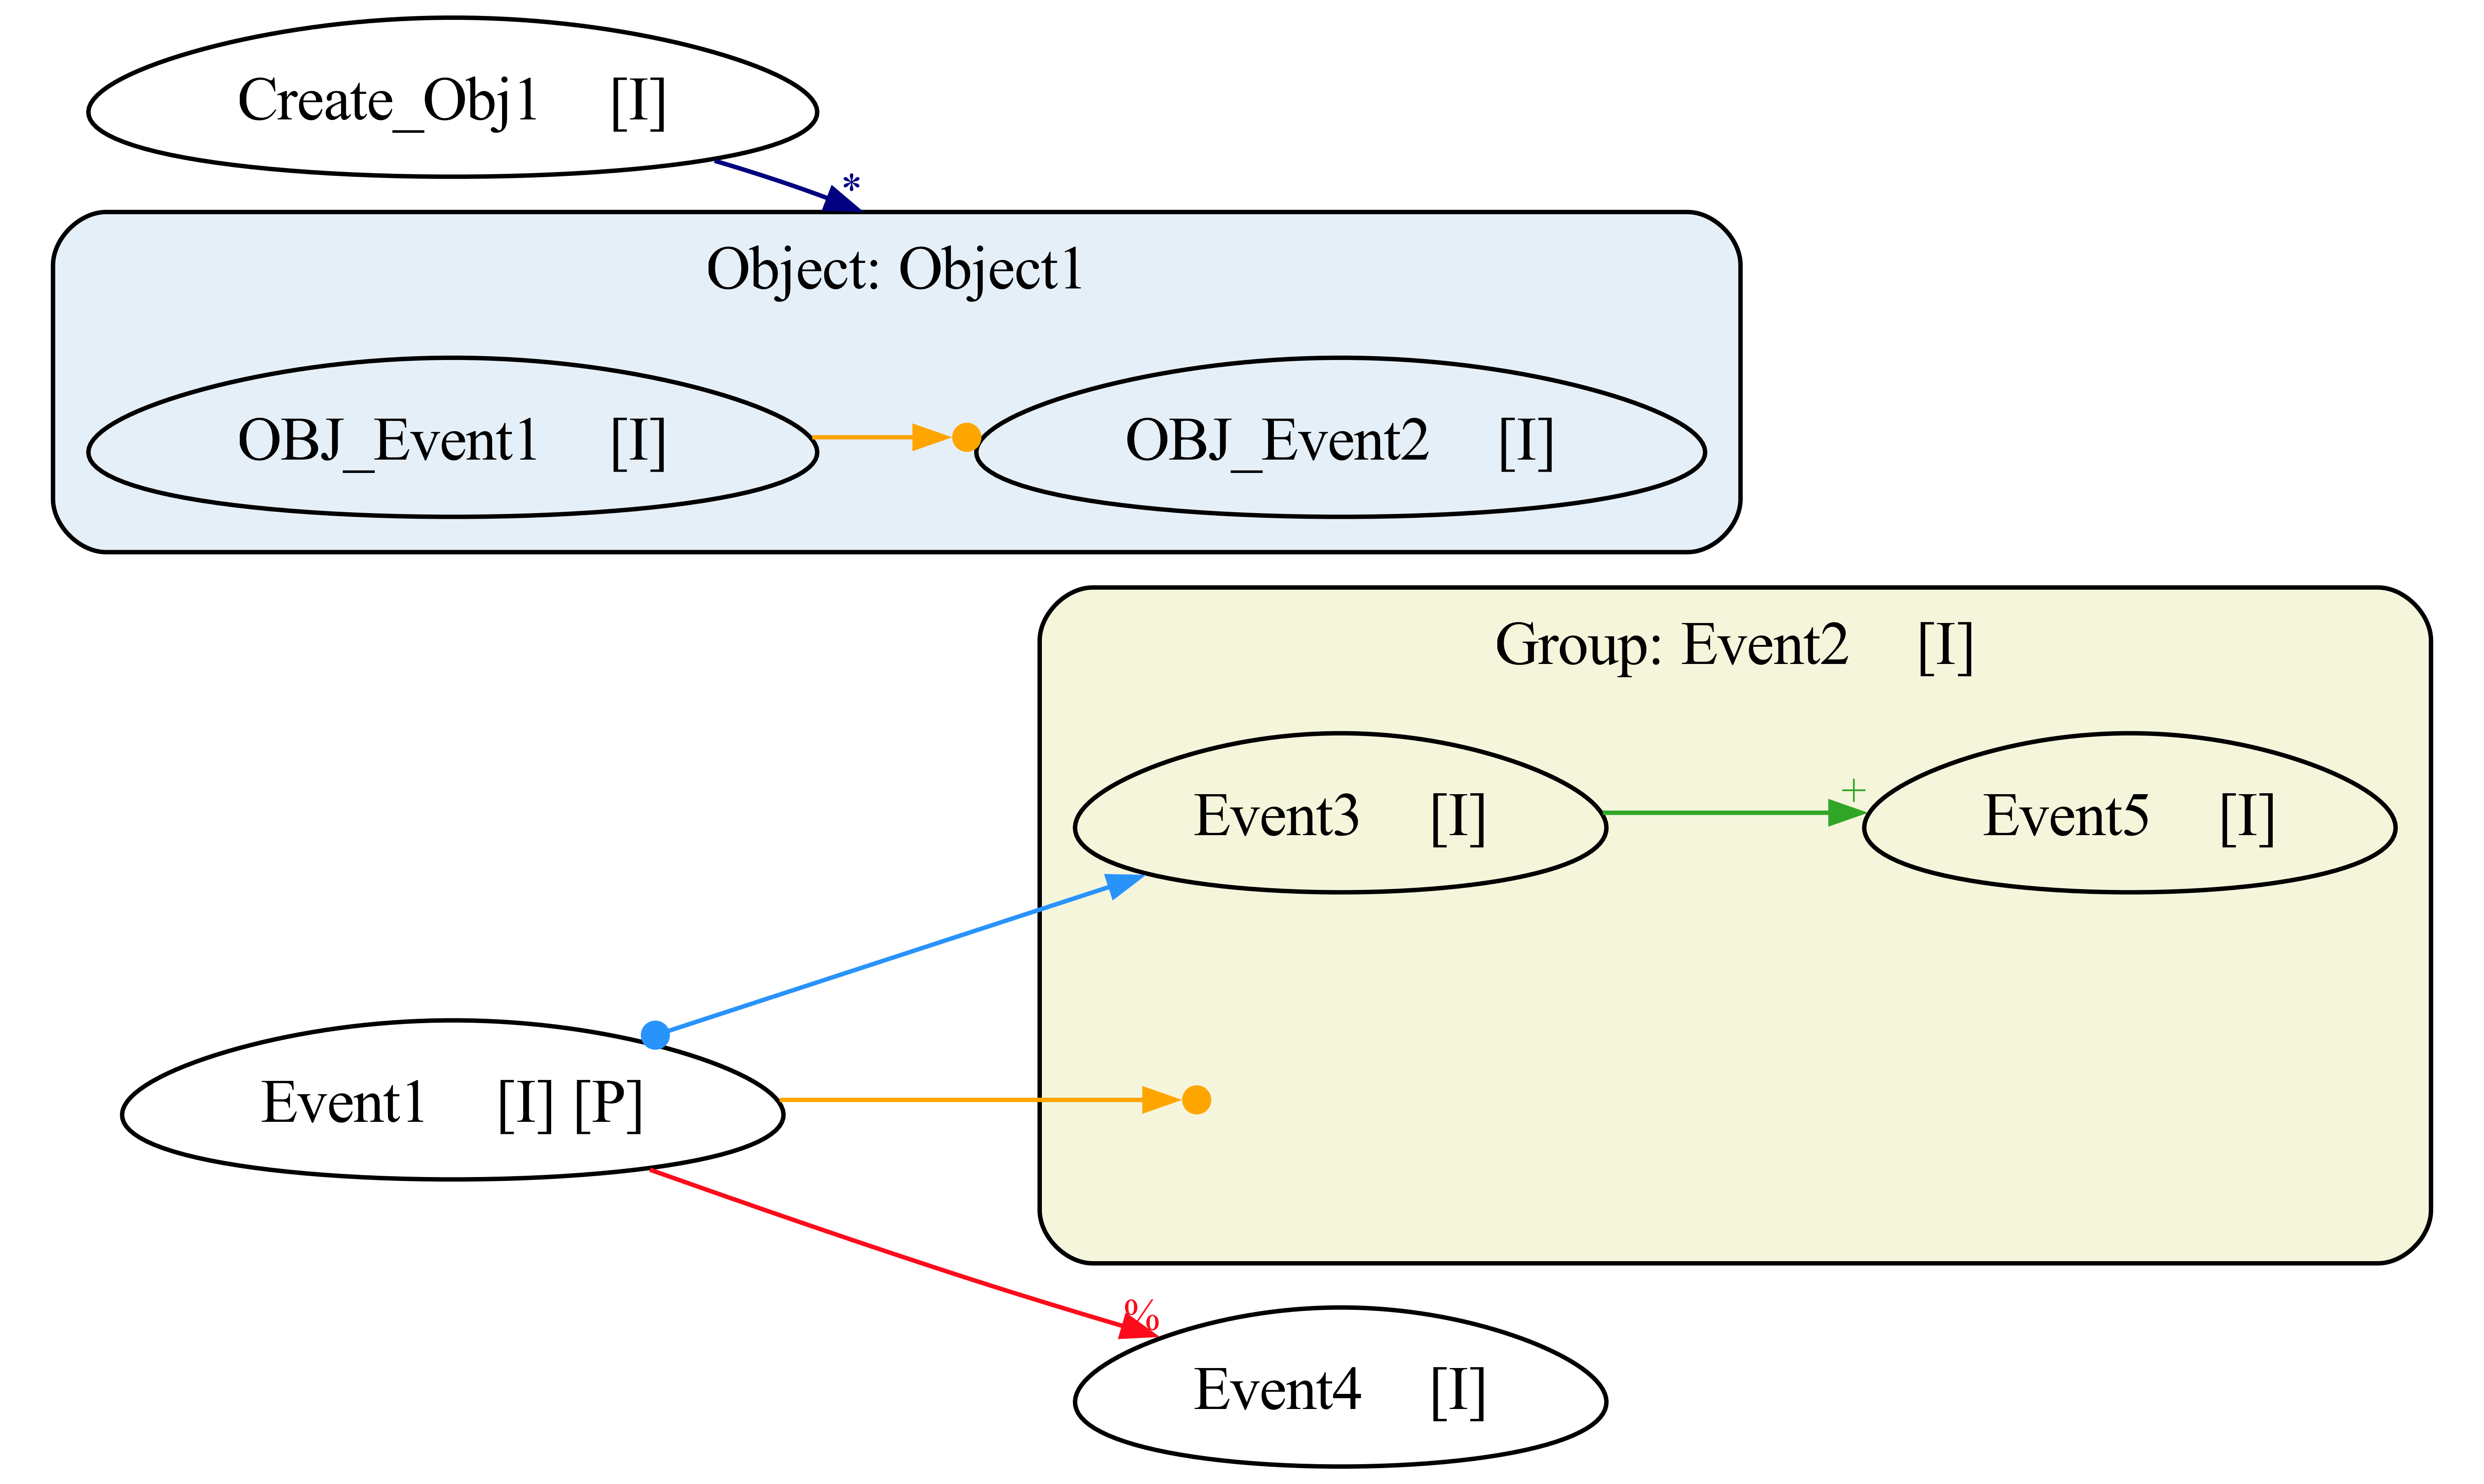

In [7]:
# Visualisation
dcr_vis.view(dcr_vis.apply(ocdcr))

Adding Many-to-Many and One-to-Many are added using the same way as before, but be aware to set the quantifiers correspondingly.

In [8]:
ocdcr.add_relation('Event1', 'OBJ_Event1', RelationTyps.C, False, True)
ocdcr.add_relation('OBJ_Event2', 'OBJ_Event2', RelationTyps.E, True, True)
ocdcr.add_relation('OBJ_Event1', 'OBJ_Event1', RelationTyps.C, True, True)
ocdcr.add_relation('OBJ_Event2', 'Event4', RelationTyps.E, True, False)

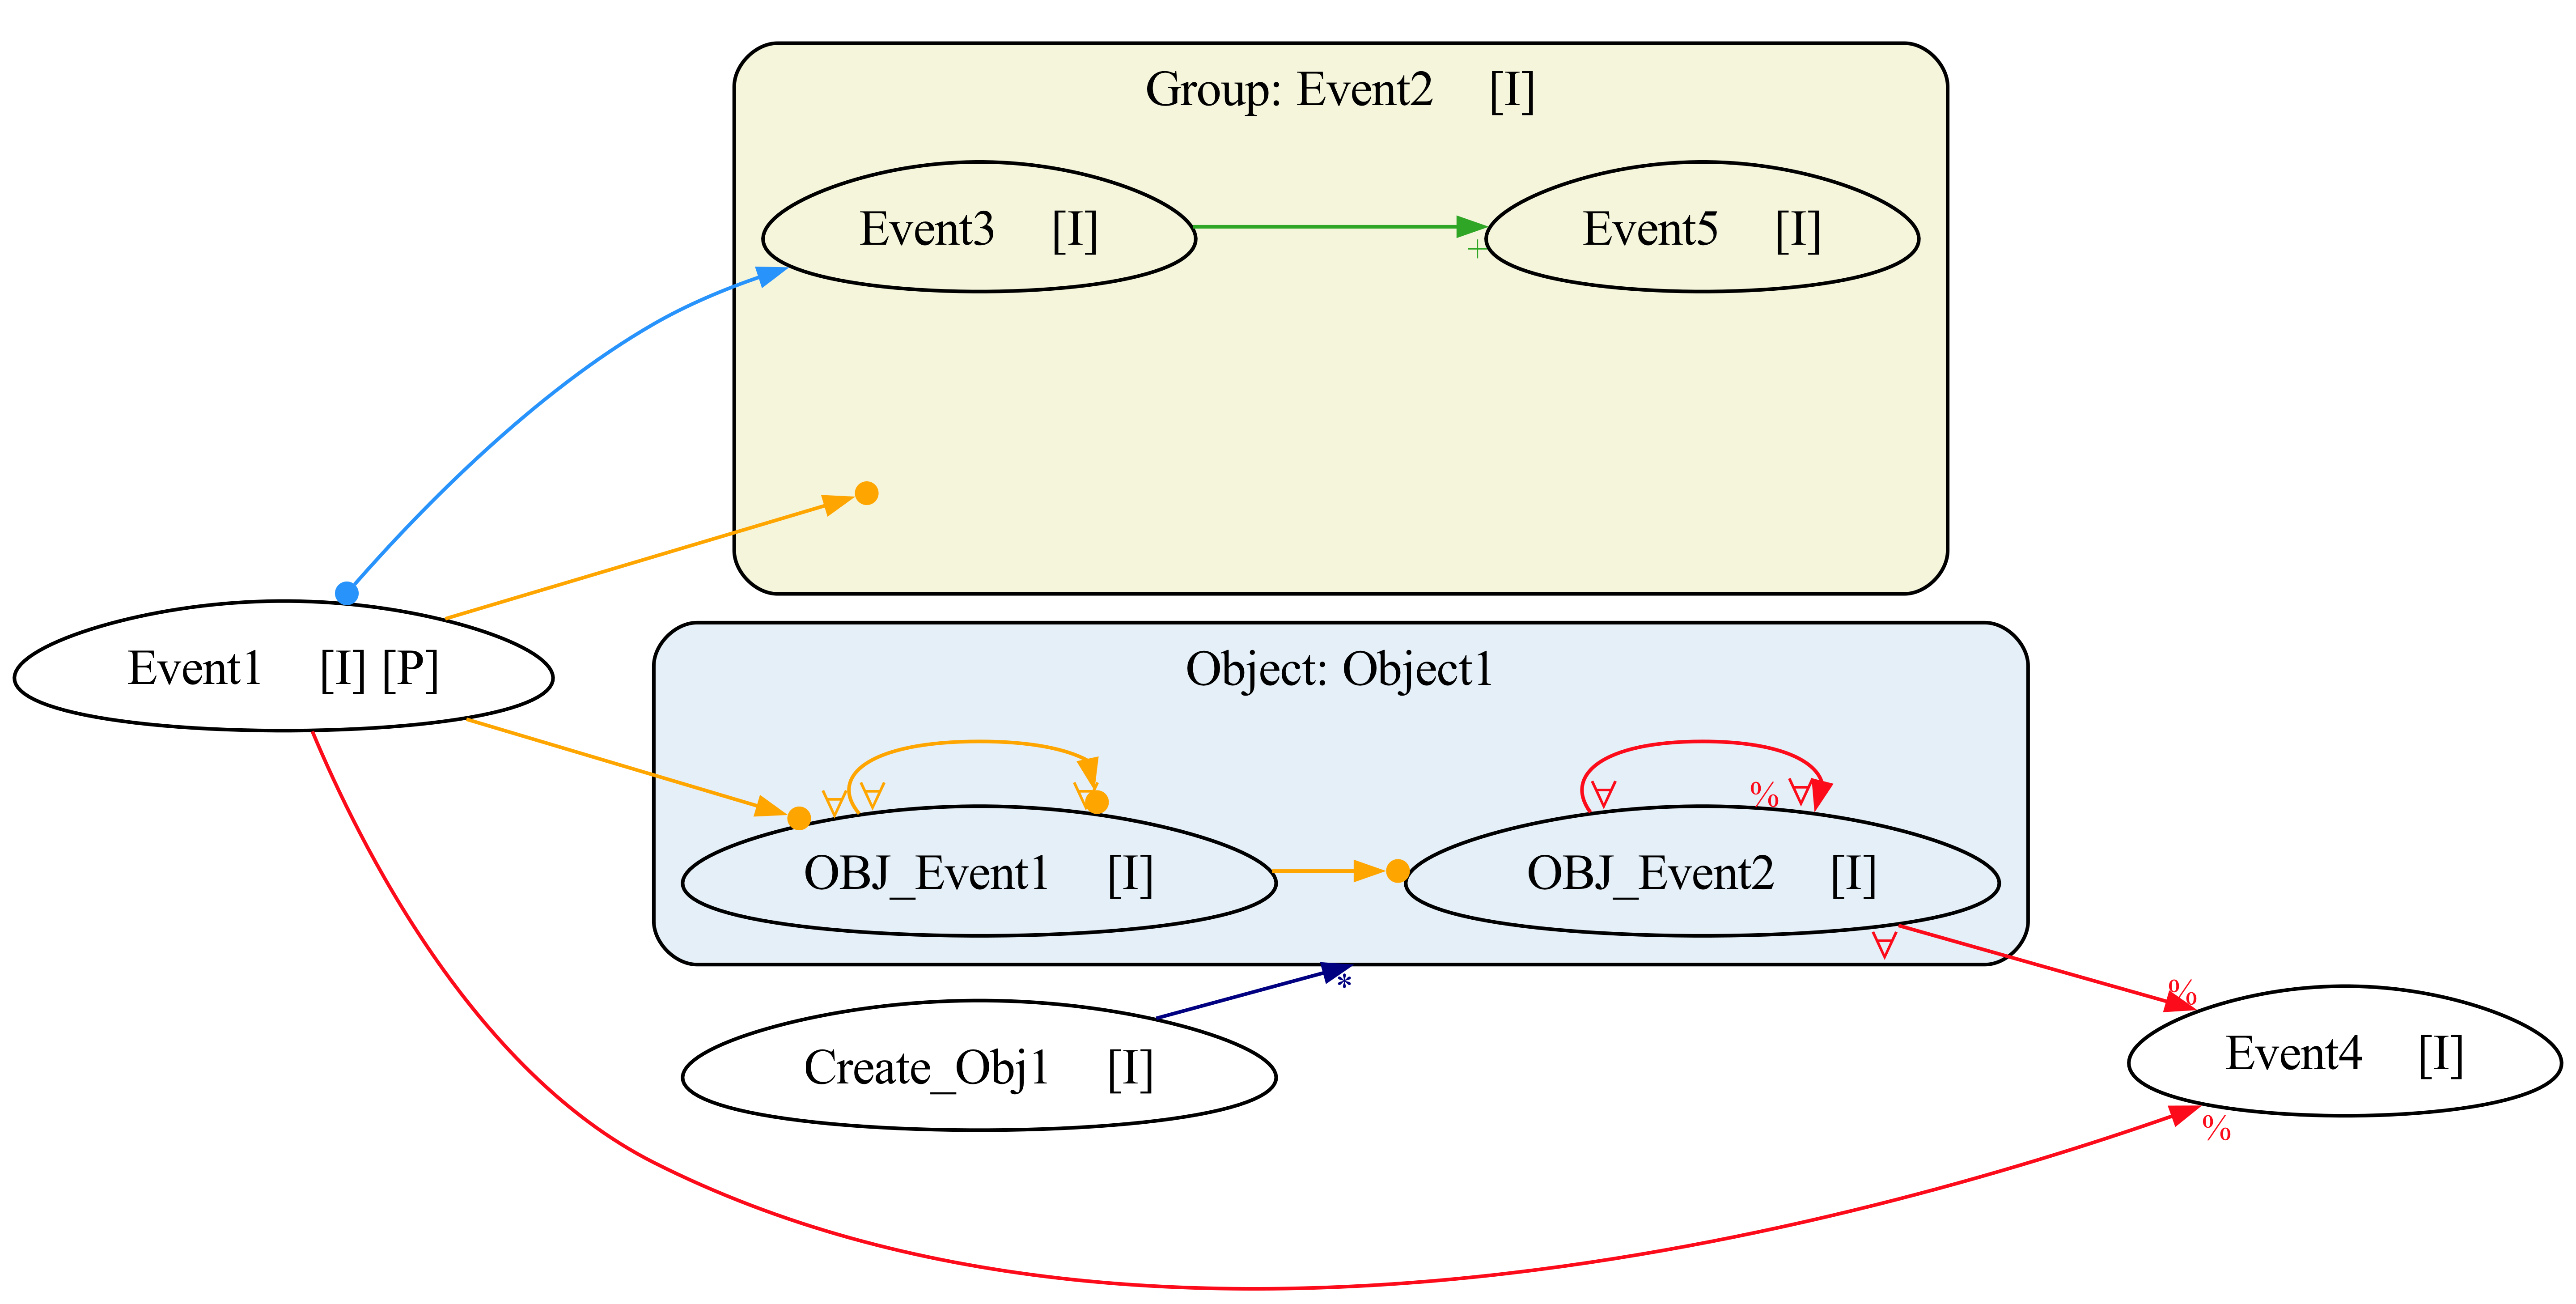

In [9]:
# Visualisation
dcr_vis.view(dcr_vis.apply(ocdcr))

## Utility Functions

### Export
(OC-)DCR Graphs can be exported as XML files. Every graph has the

In [10]:
ocdcr.export_as_xml(output_file_name='oc_dcr_graph.xml', dcr_title='XML Export example')

In [11]:
# Display the exported XML file
with open('oc_dcr_graph.xml', 'r', encoding='utf-8') as file:
    xml_content = file.read()

# Display as formatted code block
display(Markdown(f"```xml\n{xml_content}\n```"))

```xml
<dcrgraph title="XML Export example">
  <specification>
    <resources>
      <events>
        <event id="Event2">
          <event id="Event5"/>
          <event id="Event3"/>
        </event>
        <event id="Event1"/>
        <event id="Create_Obj1"/>
        <event id="Event4"/>
        <event id="OBJ_Event2"/>
        <event id="OBJ_Event1"/>
      </events>
      <labels>
        <label id="Event2"/>
        <label id="Event5"/>
        <label id="Event3"/>
        <label id="Event1"/>
        <label id="Create_Obj1"/>
        <label id="Event4"/>
        <label id="OBJ_Event2"/>
        <label id="OBJ_Event1"/>
      </labels>
      <labelMappings>
        <labelMapping eventId="Event2" labelId="Event2"/>
        <labelMapping eventId="Event5" labelId="Event5"/>
        <labelMapping eventId="Event3" labelId="Event3"/>
        <labelMapping eventId="Event1" labelId="Event1"/>
        <labelMapping eventId="Create_Obj1" labelId="Create_Obj1"/>
        <labelMapping eventId="Event4" labelId="Event4"/>
        <labelMapping eventId="OBJ_Event2" labelId="OBJ_Event2"/>
        <labelMapping eventId="OBJ_Event1" labelId="OBJ_Event1"/>
      </labelMappings>
    </resources>
    <constraints>
      <conditions>
        <condition sourceId="Event1" targetId="OBJ_Event1"/>
        <condition sourceId="OBJ_Event1" targetId="OBJ_Event2"/>
        <condition sourceId="Event1" targetId="Event2"/>
        <condition sourceId="OBJ_Event1" targetId="OBJ_Event1"/>
      </conditions>
      <responses>
        <response sourceId="Event1" targetId="Event3"/>
      </responses>
      <excludes>
        <exclude sourceId="OBJ_Event2" targetId="Event4"/>
        <exclude sourceId="OBJ_Event2" targetId="OBJ_Event2"/>
        <exclude sourceId="Event1" targetId="Event4"/>
      </excludes>
      <includes>
        <include sourceId="Event3" targetId="Event5"/>
      </includes>
    </constraints>
    <spawns>
      <spawn sourceId="Create_Obj1" targetId="Object1"/>
    </spawns>
    <objects>
      <object objectId="Object1"/>
    </objects>
    <object_mappings>
      <objectMapping eventId="Event3" objectId="tg"/>
      <objectMapping eventId="Event1" objectId="tg"/>
      <objectMapping eventId="Event4" objectId="tg"/>
      <objectMapping eventId="Event5" objectId="tg"/>
      <objectMapping eventId="Event2" objectId="tg"/>
      <objectMapping eventId="OBJ_Event2" objectId="Object1"/>
      <objectMapping eventId="OBJ_Event1" objectId="Object1"/>
      <objectMapping eventId="Create_Obj1" objectId="tg"/>
    </object_mappings>
  </specification>
  <runtime>
    <marking>
      <executed/>
      <included>
        <event id="Event3"/>
        <event id="OBJ_Event2"/>
        <event id="Event5"/>
        <event id="Event2"/>
        <event id="OBJ_Event1"/>
        <event id="Event1"/>
        <event id="Create_Obj1"/>
        <event id="Event4"/>
      </included>
      <pendingResponses>
        <event id="Event1"/>
      </pendingResponses>
    </marking>
  </runtime>
</dcrgraph>

```

### Filtering

In [12]:
from ocpa.objects.oc_dcr_graph import filtering as filter

filtered_by_type = filter.filter_by_relation_type(ocdcr, {RelationTyps.C})

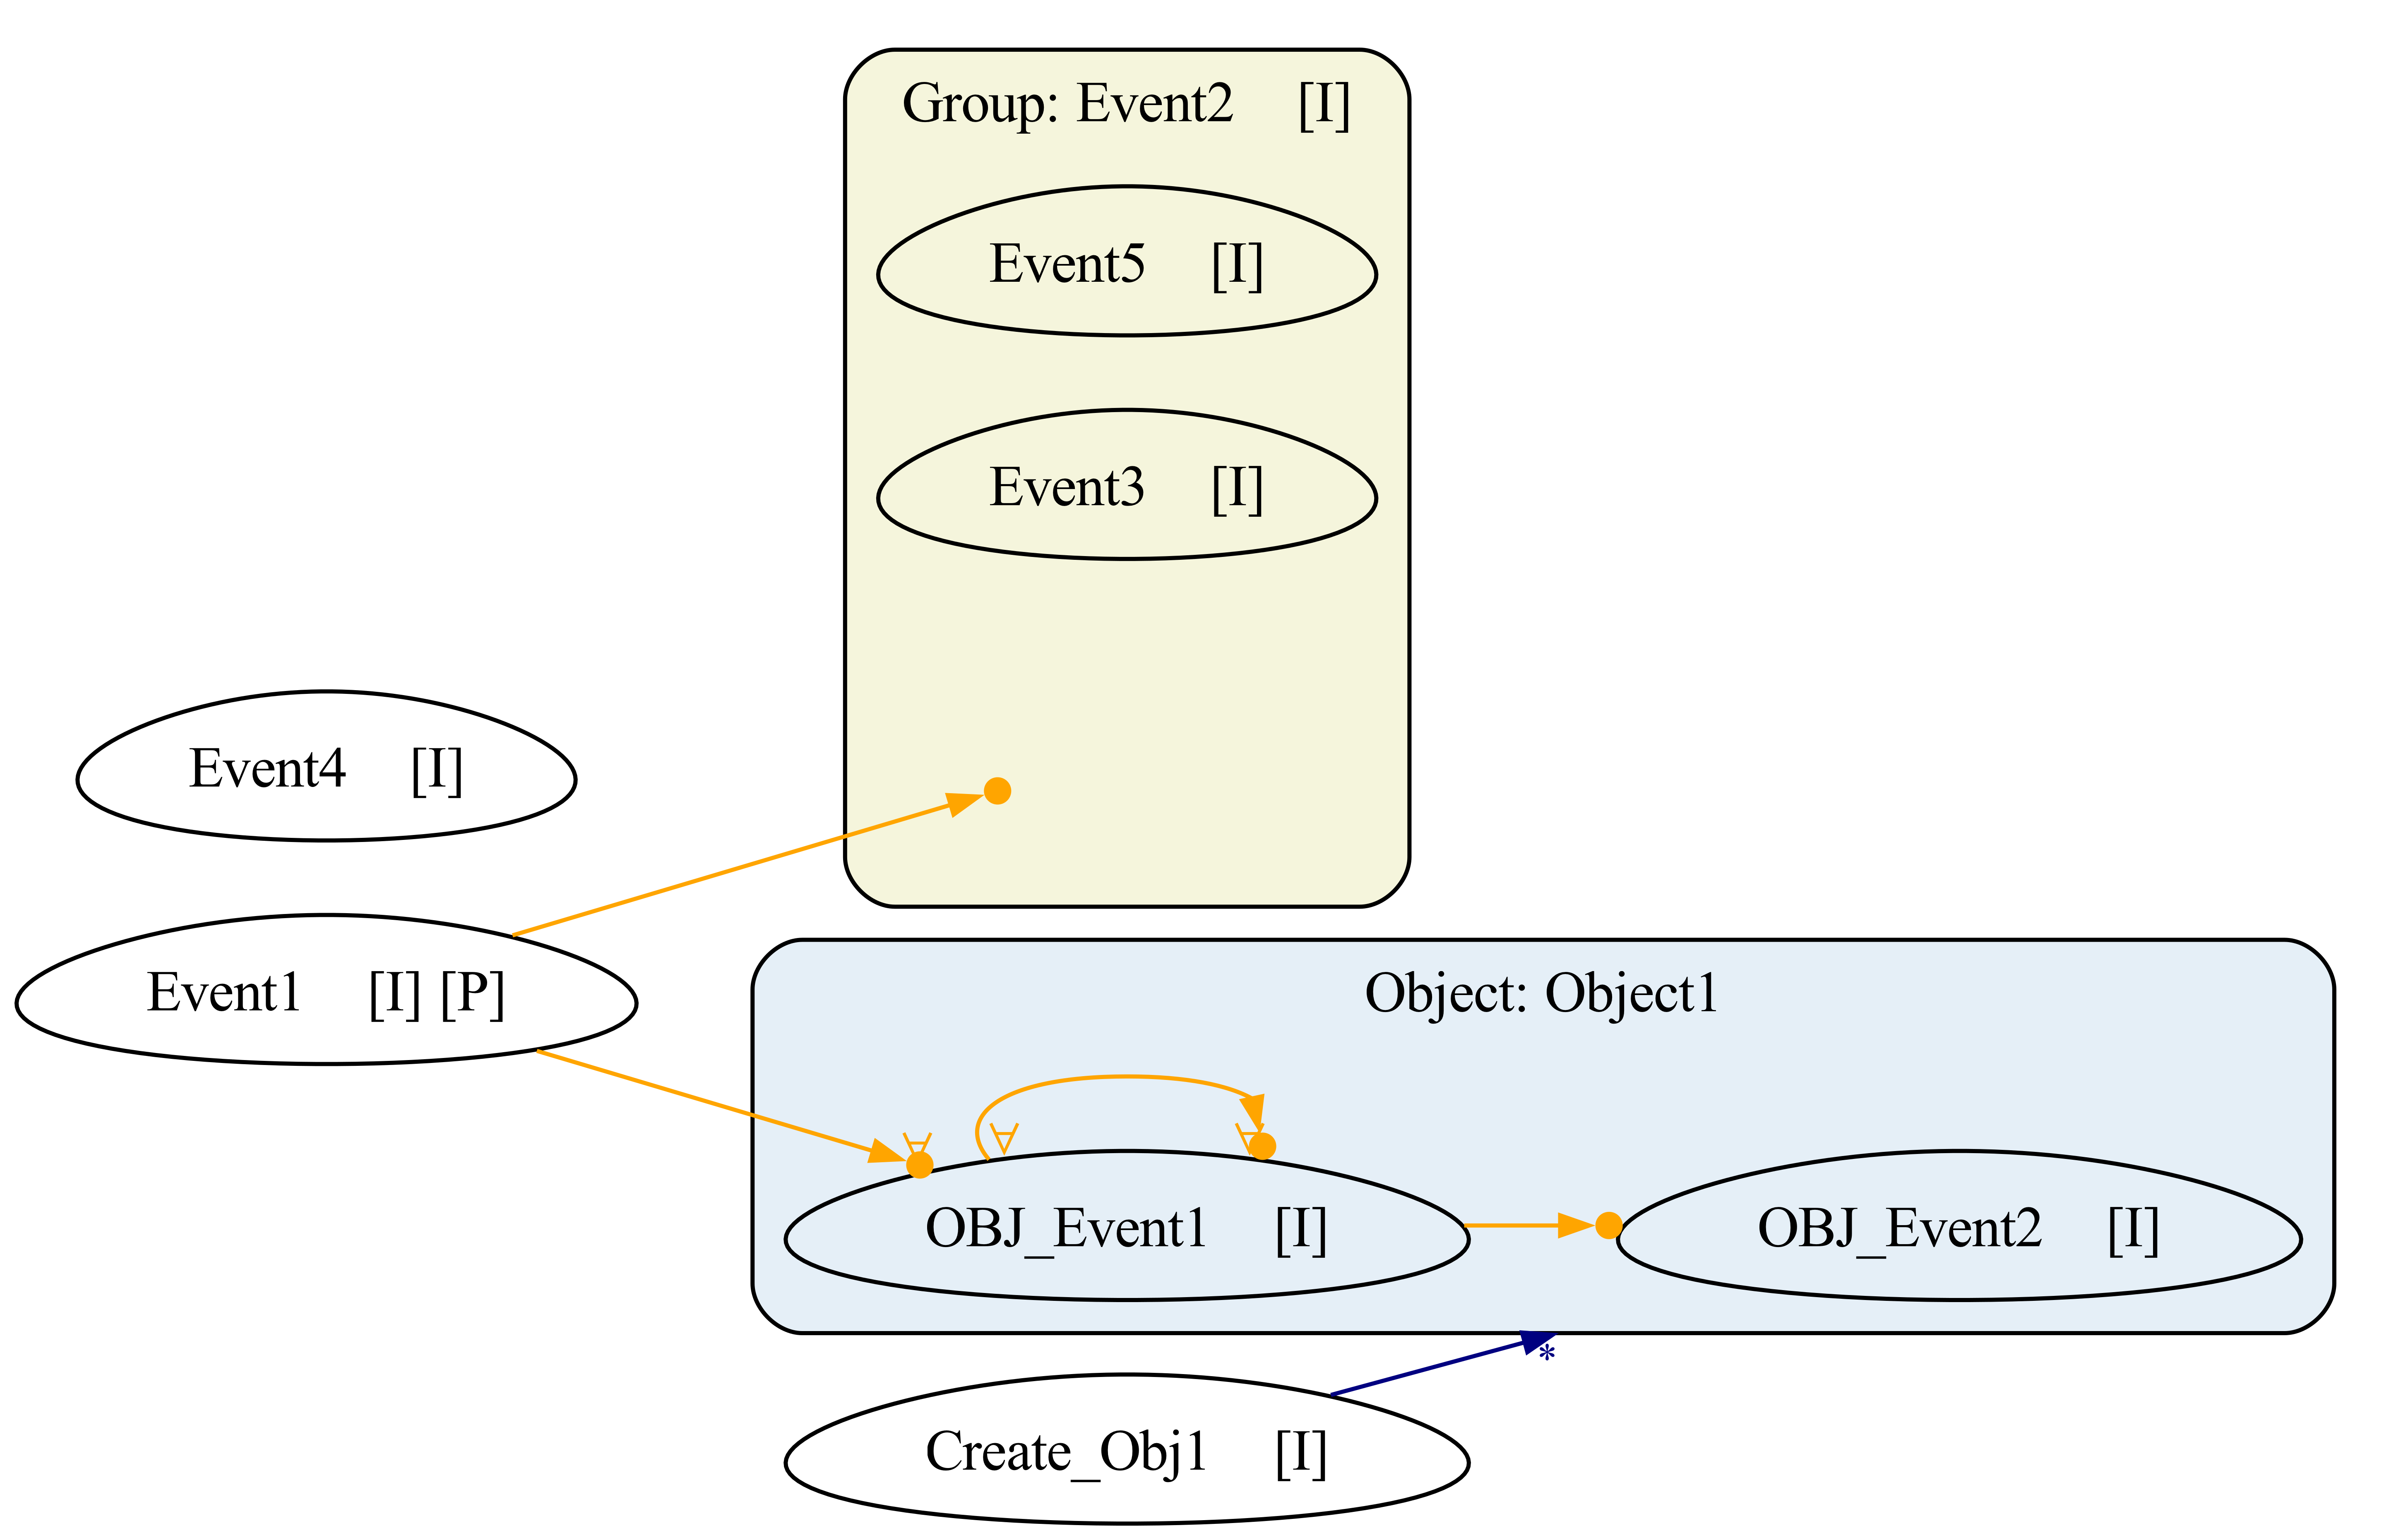

In [13]:
# Visualize
dcr_vis.view(dcr_vis.apply(filtered_by_type))

In [14]:
filtered_many_to_many = filter.filter_many_to_many(ocdcr, {RelationTyps.C})

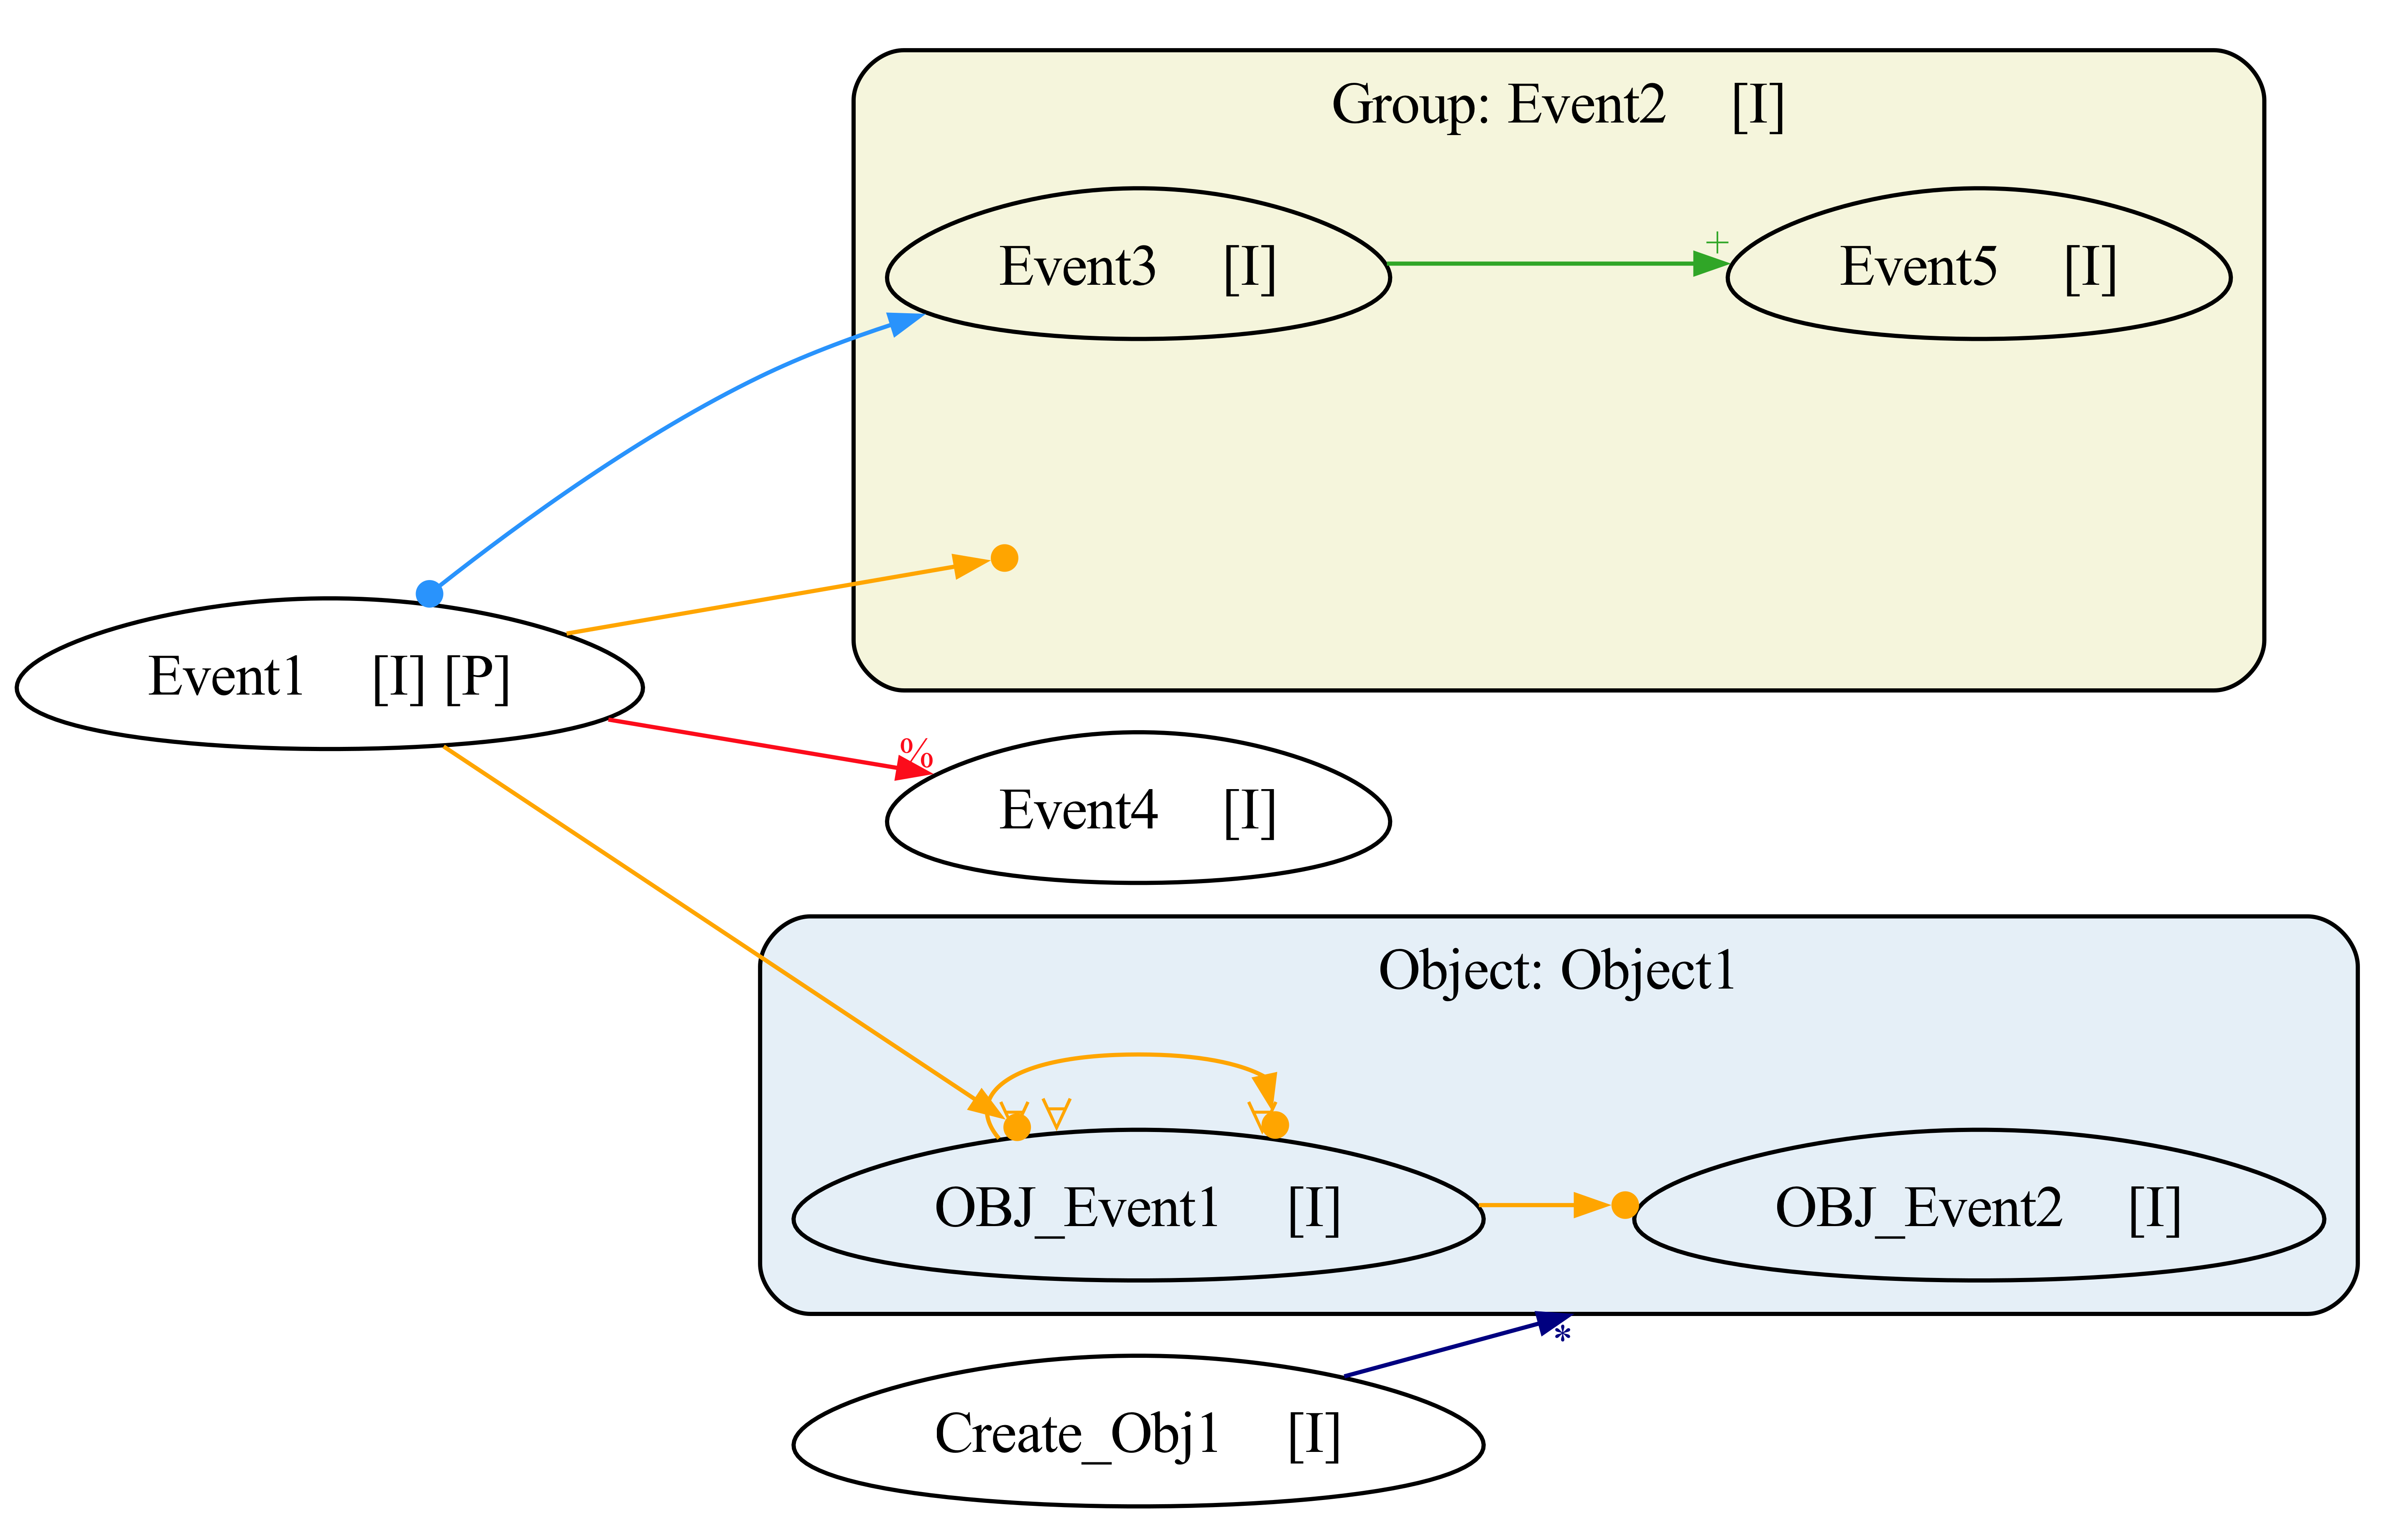

In [15]:
# Visualize
dcr_vis.view(dcr_vis.apply(filtered_many_to_many))

In [16]:
filtered_one_to_many = filter.filter_one_to_many(ocdcr, {RelationTyps.C})

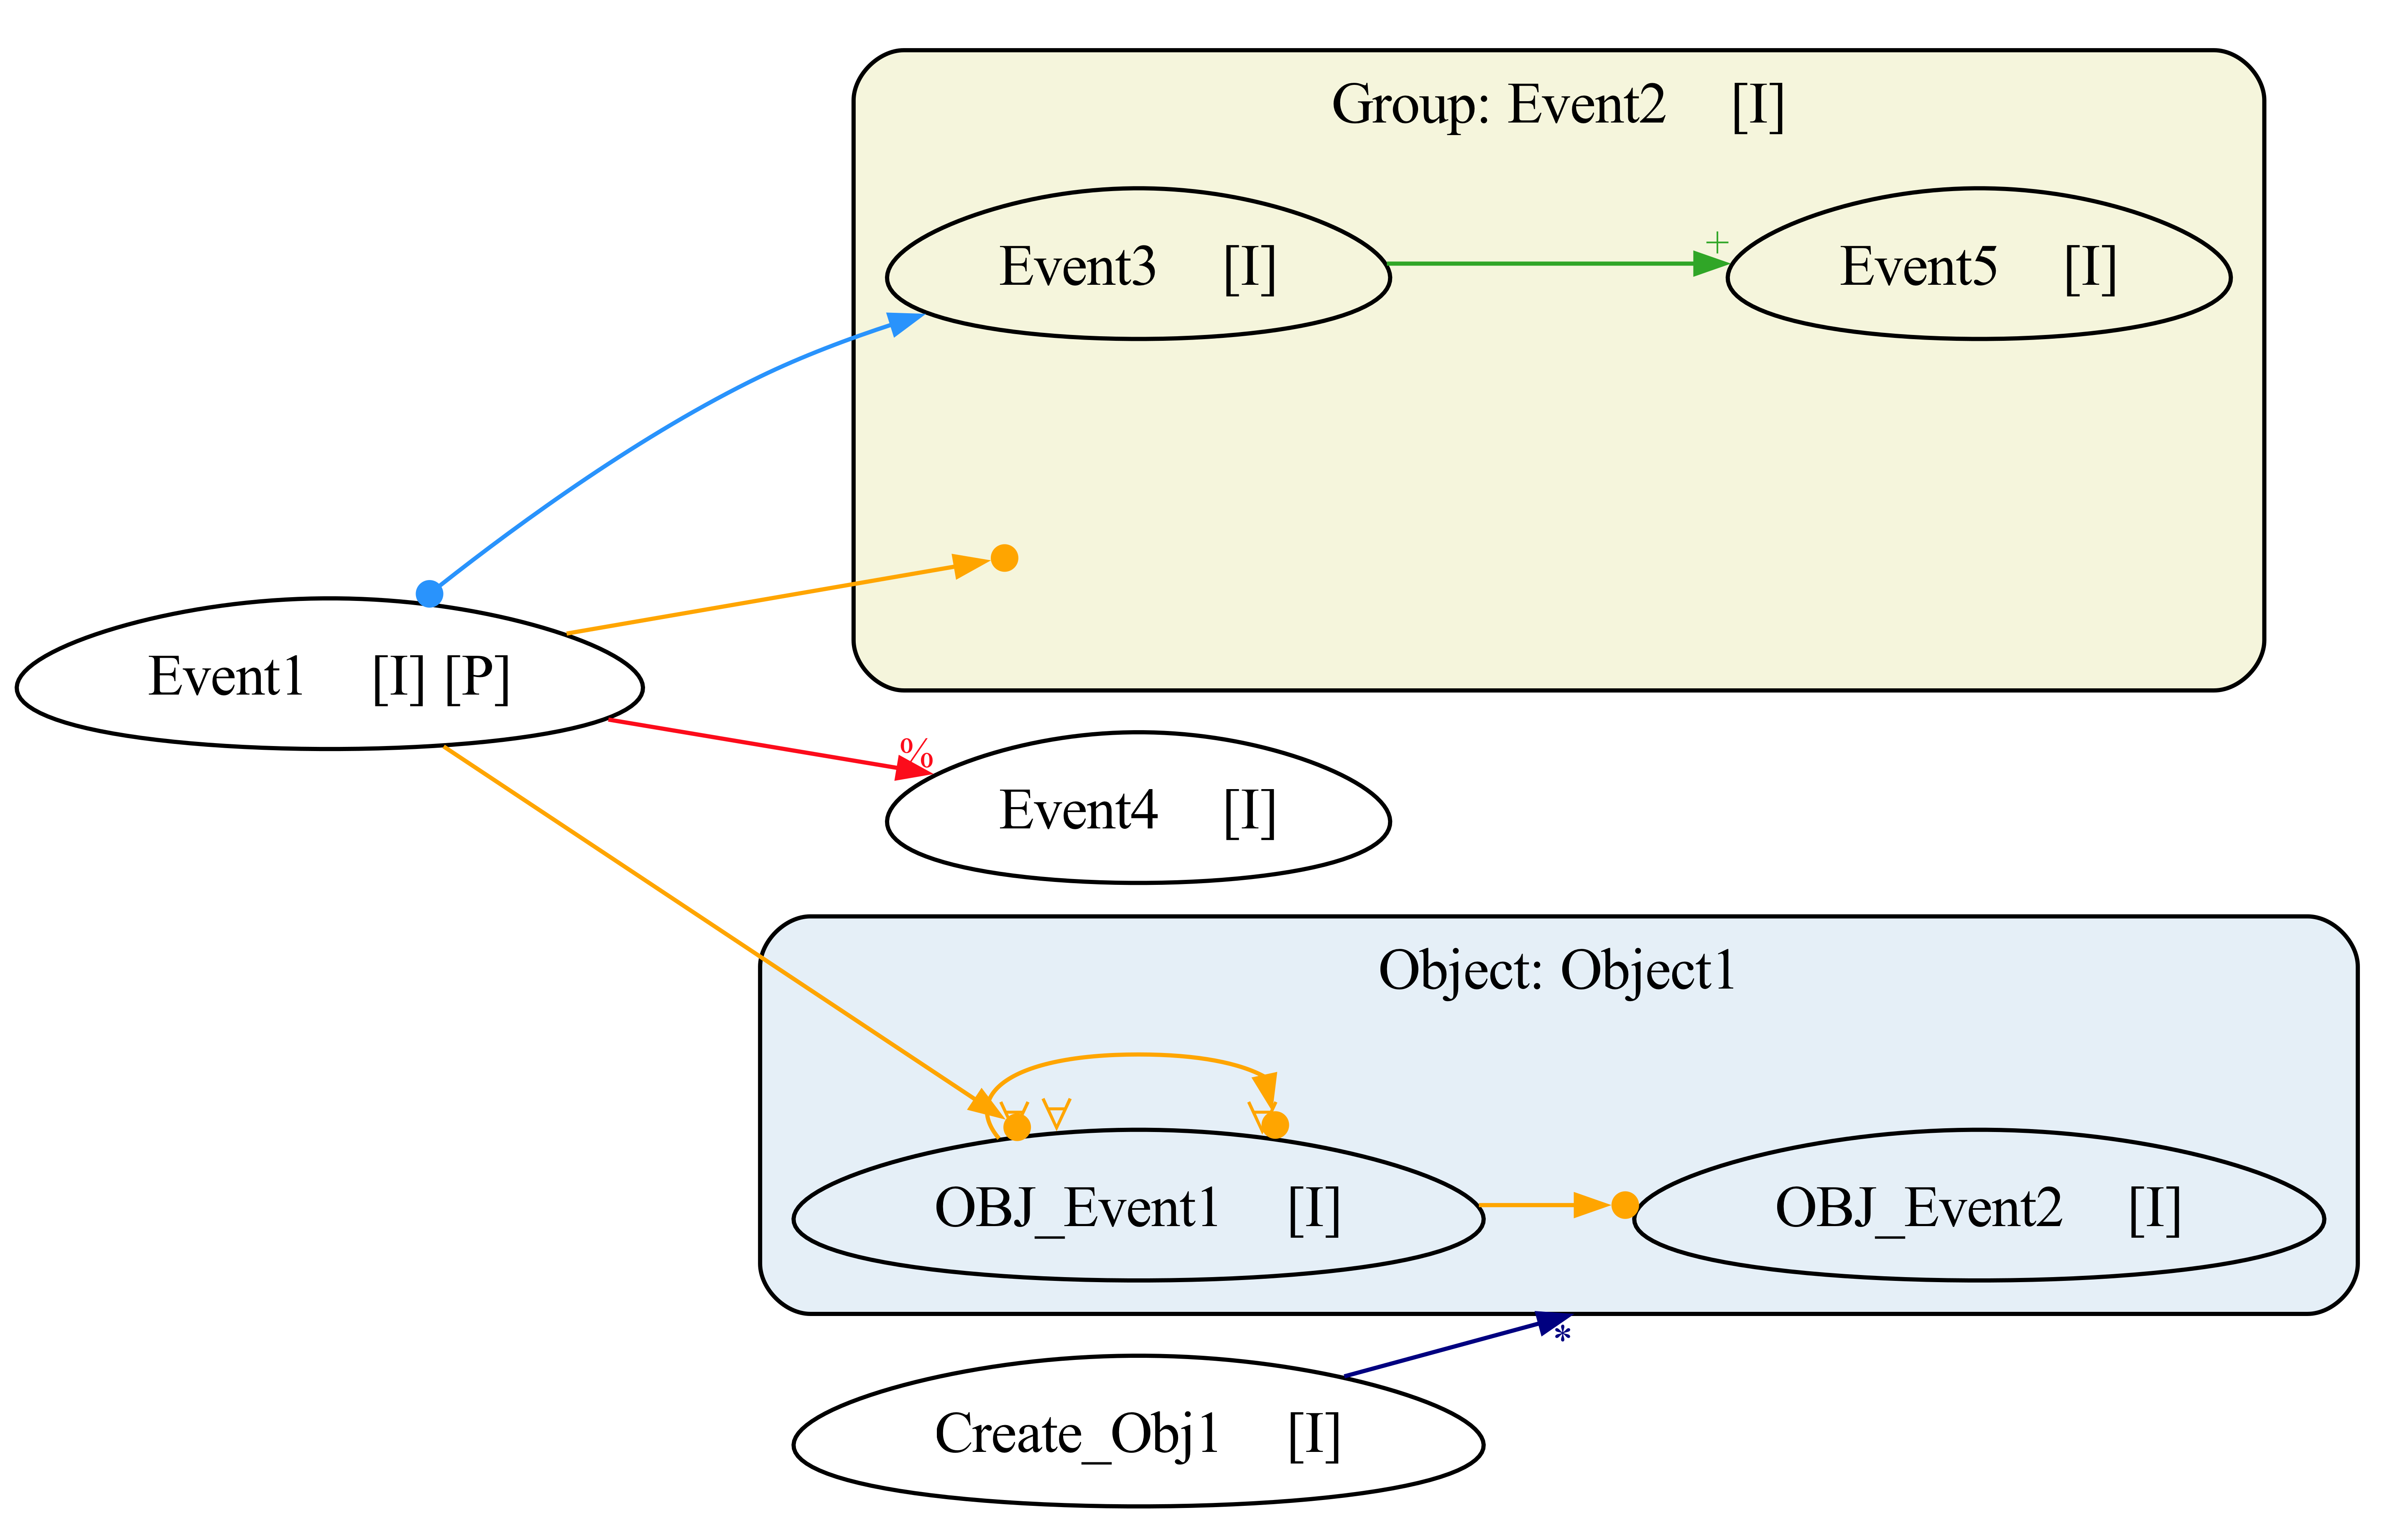

In [17]:
# Visualize
dcr_vis.view(dcr_vis.apply(filtered_one_to_many))

## Visualization

(OC-)DCR Graphs can be converted into graphviz Digraphs using the visualizers `apply` function. Those Digraphs can then be `view`ed or `save`d as PNG images.

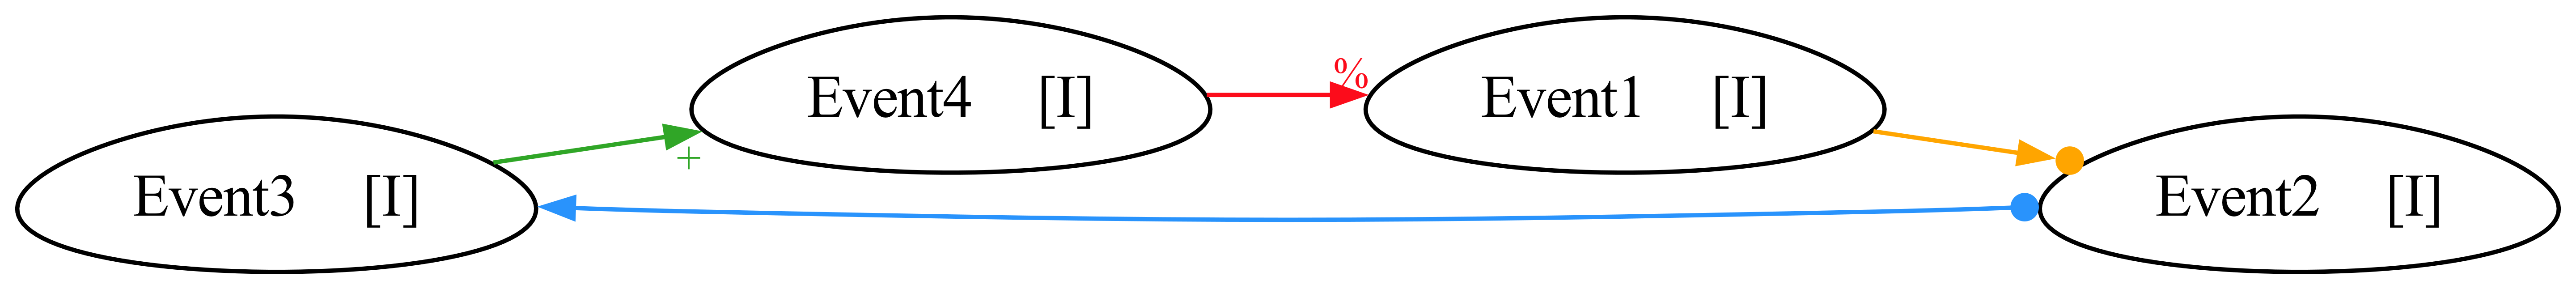

In [18]:
import ocpa.visualization.oc_dcr_vis as dcr_vis
from ocpa.objects.oc_dcr_graph import DCRGraph

template = {'events': {'Event3', 'Event4', 'Event1', 'Event2'},
            'marking': {'executed': set(), 'pending': set(), 'included': {'Event3', 'Event4', 'Event1', 'Event2'}},
            'includesTo': {'Event3': {'Event4'}},
            'excludesTo': {'Event4': {'Event1'}},
            'responseTo': {'Event2': {'Event3'}}, 'conditionsFor': {'Event2': {'Event1'}},
            'nestedgroups': {}}

example_graph = DCRGraph(template=template)

# Convert to Digraph
graph = dcr_vis.apply(example_graph)

# View in local image viewer
dcr_vis.view(dcr_vis.apply(example_graph))

# Export as PNG
dcr_vis.save(dcr_vis.apply(example_graph), 'graph.png')

 # OCDisCoveR

## CSV to OCEL
Since the discover algorithm uses OCPA's object centric event log format we have to convert the csv log into this format. In this example we will be using the final.csv log from the sample logs.

<div style="text-align: center;">
  <img src="img/final_log.png" alt="Example CSV Log" width="350"/>
</div>

First of all we have to get the file path

In [19]:
import os
log_path = os.path.join(os.getcwd(), "../sample_logs/csv", "final.csv")

Then we define the object types and create a parameter dict, like usual in OCPA

In [20]:
object_types = ["Order", "Item", "Package", "Customer"]

parameters = {
    "obj_names": object_types,
    "val_names": [],
    "act_name": "activity",
    "time_name": "timestamp",
    "sep": ","
}

and apply the `csv_to_ocel` function from `ocpa.util.dcr.import_export`

In [21]:
from ocpa.util.dcr.import_export import csv_to_ocel
ocel = csv_to_ocel(filepath=log_path, parameters=parameters)

# Optionally export as jsonocel
from ocpa.objects.log.exporter.ocel import factory as ocel_export_factory
ocel_export_factory.apply(ocel, "final.jsonocel")

Table Format Successfully Imported
Object Format Successfully Imported
Graph Format Successfully Imported


{'ocel:global-log': {'ocel:attribute-names': ['event_id'],
  'ocel:object-types': ['Package', 'Customer', 'Order', 'Item'],
  'ocel:version': '1.0',
  'ocel:ordering': 'timestamp'},
 'ocel:global-event': {'ocel:activity': '__INVALID__'},
 'ocel:global-object': {'ocel:type': '__INVALID__'},
 'ocel:events': {'1': {'ocel:activity': 'Verify Customer Info',
   'ocel:timestamp': '2024-01-01T08:50:00',
   'ocel:omap': ['C01'],
   'ocel:vmap': {'event_id': '0',
    'start_timestamp': Timestamp('2024-01-01 08:50:00')}},
  '2': {'ocel:activity': 'Create Order',
   'ocel:timestamp': '2024-01-01T09:00:00',
   'ocel:omap': ['O1'],
   'ocel:vmap': {'event_id': '1',
    'start_timestamp': Timestamp('2024-01-01 09:00:00')}},
  '3': {'ocel:activity': 'Assign Customer to Order',
   'ocel:timestamp': '2024-01-01T09:01:00',
   'ocel:omap': ['C01', 'O1'],
   'ocel:vmap': {'event_id': '2',
    'start_timestamp': Timestamp('2024-01-01 09:01:00')}},
  '4': {'ocel:activity': 'Add Item',
   'ocel:timestamp': '2

## Apply OCDisCoveR on OCEL

Before the algorithm can be applied the input parameters have to be defined

In [22]:
from ocpa.objects.oc_dcr_graph import IN_TOP_GRAPH

activities_mapping = {
    "Link Item to Order": "Item",
    "Ship Order": "Order",
    "Accept": IN_TOP_GRAPH,
    "Assign Customer to Order": "Order",
    "Deliver Package": "Package",
    "Verify Customer Info": "Customer",
    "Send Promotion": "Customer",
    "Receive Feedback": "Customer",
}

spawn_mapping = dict({
    ("Order", "Create Order"),
    ("Item", "Add Item"),
    ("Package", "Pack Order")  # Package dynamically created
})

derived_entities = [
    ("Order","Package"),
    ("Order","Item")
]

The OCDisCoveR algorithm is then actually applied using its apply function, returning the OC-DCR Graph

In [23]:
from ocpa.algo.discovery.oc_dcr import apply

graph = apply(ocel=ocel, spawn_mapping=spawn_mapping, activities_mapping=activities_mapping, derived_entities=derived_entities)

INFO:ocpa.algo.discovery.oc_dcr.util.discover:Starting OC-DCR discovery process.
INFO:ocpa.algo.discovery.oc_dcr.util.discover:Step 1: Extracting object-specific traces.
INFO:ocpa.algo.discovery.oc_dcr.util.discover:Step 1 completed in 0.01 seconds.
INFO:ocpa.algo.discovery.oc_dcr.util.discover:Step 2: Applying DisCoveR to derive base DCR graph.
INFO:ocpa.algo.discovery.oc_dcr.util.discover:Step 2 completed in 0.03 seconds.
INFO:ocpa.algo.discovery.oc_dcr.util.discover:Step 3: Translating base DCR into OC-DCR structure.
INFO:ocpa.algo.discovery.oc_dcr.util.discover:Step 3 completed in 0.00 seconds.
INFO:ocpa.algo.discovery.oc_dcr.util.discover:Step 4: Identifying transitive closures for many-to-many relationships.
INFO:ocpa.algo.discovery.oc_dcr.util.discover:Step 4 completed in 0.01 seconds.
INFO:ocpa.algo.discovery.oc_dcr.util.discover:Step 5a: Adding many-to-many exclude relations.
INFO:ocpa.algo.discovery.oc_dcr.util.discover:Step 5a completed in 0.00 seconds.
INFO:ocpa.algo.discov

shape: (21, 4)
┌───────────────────┬──────────────────────────┬─────────────────────┬───────────┐
│ case:concept:name ┆ concept:name             ┆ time:timestamp      ┆ object_id │
│ ---               ┆ ---                      ┆ ---                 ┆ ---       │
│ str               ┆ str                      ┆ datetime[μs]        ┆ str       │
╞═══════════════════╪══════════════════════════╪═════════════════════╪═══════════╡
│ closure_0         ┆ Verify Customer Info     ┆ 2024-01-01 08:50:00 ┆ C01       │
│ closure_0         ┆ Create Order             ┆ 2024-01-01 09:00:00 ┆ O1        │
│ closure_0         ┆ Assign Customer to Order ┆ 2024-01-01 09:01:00 ┆ O1        │
│ closure_0         ┆ Add Item                 ┆ 2024-01-01 09:05:00 ┆ I1        │
│ closure_0         ┆ Link Item to Order       ┆ 2024-01-01 09:06:00 ┆ I1        │
│ closure_0         ┆ Send Promotion           ┆ 2024-01-01 09:10:00 ┆ C01       │
│ closure_0         ┆ Ship Order               ┆ 2024-01-01 10:00:00 ┆ O

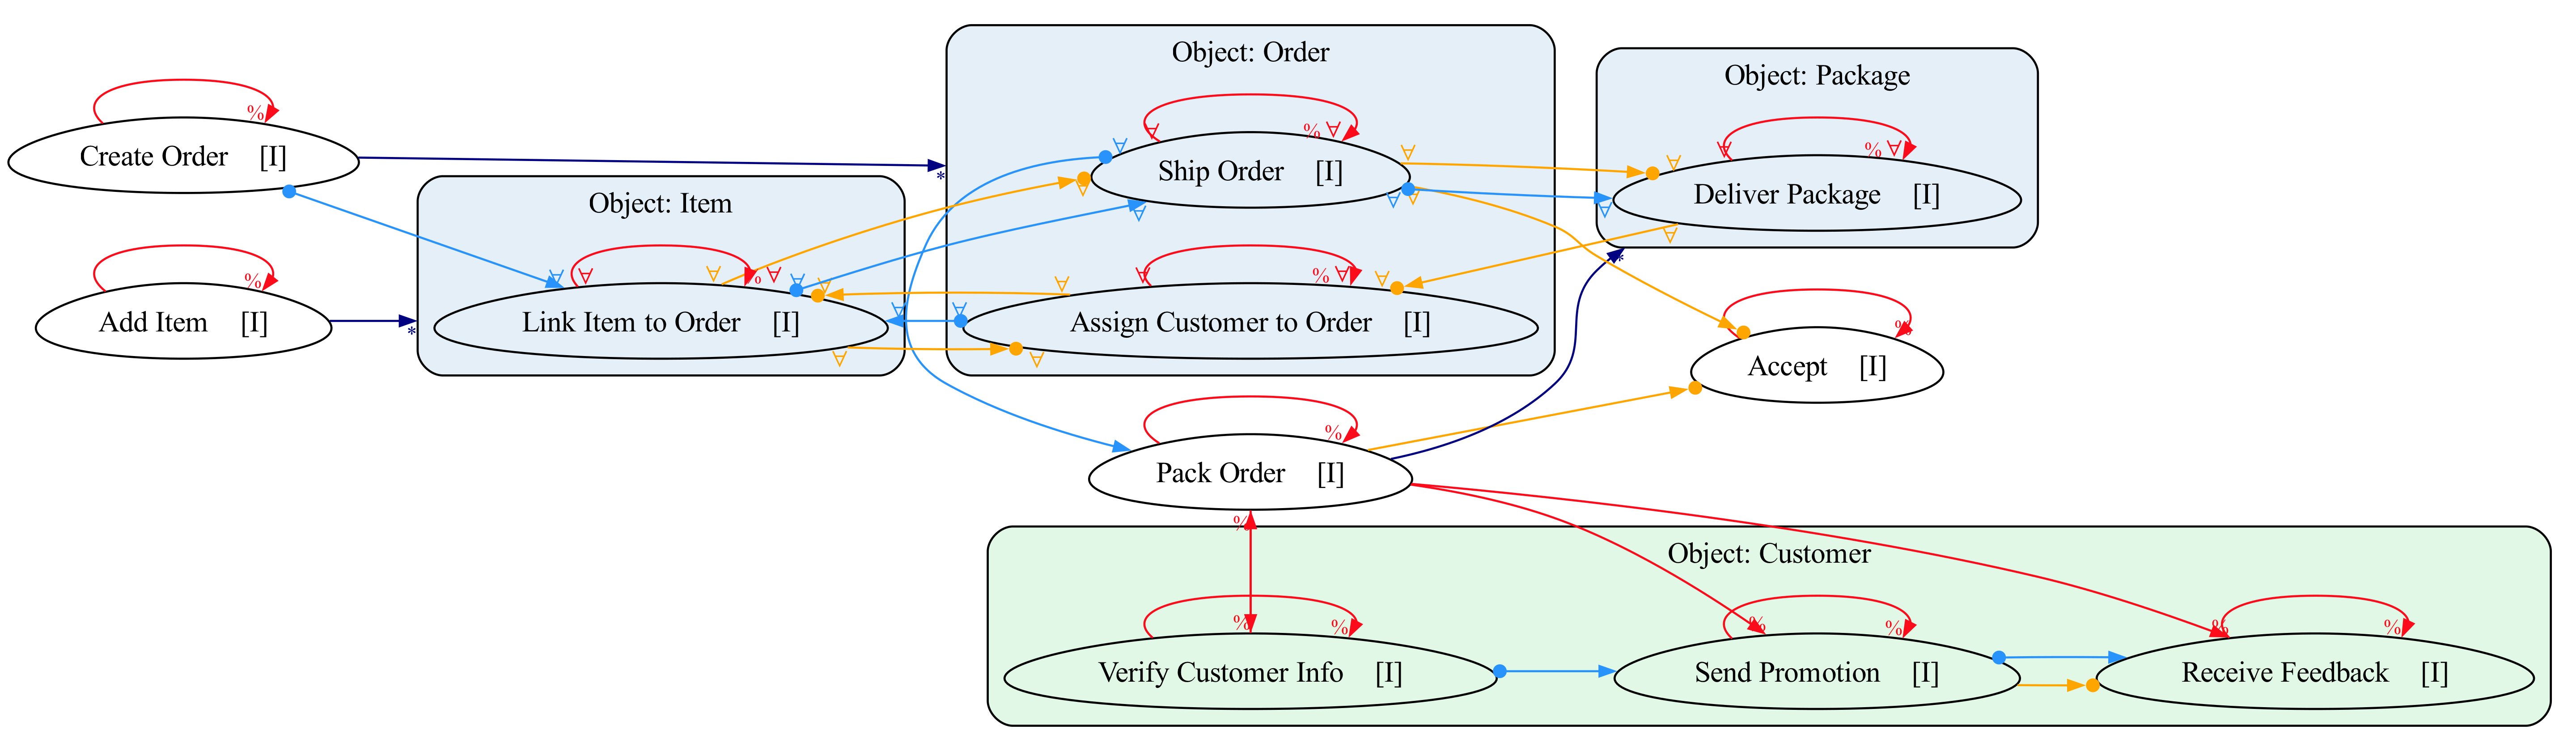

In [24]:
# Visualization
from ocpa.visualization.oc_dcr_vis import visualizer as dcr_viz
dcr_viz.view(dcr_viz.apply(graph))

## OCDisCoveR on BPI 2017

In [26]:
import os
log_path = os.path.join(os.getcwd(), "../sample_logs/jsonocel", "bpi_2017.jsonocel")
ocel_log = ocpa.objects.log.importer.ocel.factory.apply(log_path)

In [27]:
spawn_mapping = dict({
    ("offer", "Create offer")
})

### Map activities to objects

In [28]:
activities_mapping = {
    'Call': 'application',
    'Deny': 'application',
    'Accept': 'application',
    'Personal loan collection': 'application',
    'Refuse offer': 'offer',
    'Cancel offer': 'offer',
    'Cancel application': 'application',
    'Accept offer': 'offer',
    'Return': 'application',
    'Send (mail and online)': 'application',
    'Send (online)': 'application',
    'Call incomplete files': 'application',
    'Handle leads': 'application',
    'Assess potential fraud': 'application',
    'Shorten completion': 'application',
    'Validate': 'application',
    'Create application': 'application',
    'Complete': 'application',
    'Submit': 'application',
    'Pending': 'application'
}

### Apply OCDisCoveR with nested

INFO:ocpa.algo.discovery.oc_dcr.util.discover:Starting OC-DCR discovery process.
INFO:ocpa.algo.discovery.oc_dcr.util.discover:Step 1: Extracting object-specific traces.
INFO:ocpa.algo.discovery.oc_dcr.util.discover:Step 1 completed in 0.50 seconds.
INFO:ocpa.algo.discovery.oc_dcr.util.discover:Step 2: Applying DisCoveR to derive base DCR graph.
INFO:ocpa.algo.discovery.oc_dcr.util.discover:Step 2 completed in 0.82 seconds.
INFO:ocpa.algo.discovery.oc_dcr.util.discover:Step 3: Translating base DCR into OC-DCR structure.
INFO:ocpa.algo.discovery.oc_dcr.util.discover:Step 3 completed in 0.13 seconds.
INFO:ocpa.algo.discovery.oc_dcr.util.discover:Step 4: Identifying transitive closures for many-to-many relationships.
INFO:ocpa.algo.discovery.oc_dcr.util.discover:Step 4 completed in 2.74 seconds.
INFO:ocpa.algo.discovery.oc_dcr.util.discover:Step 5a: Adding many-to-many exclude relations.
IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in ord

Deleting:  Group7
Deleting:  Group3


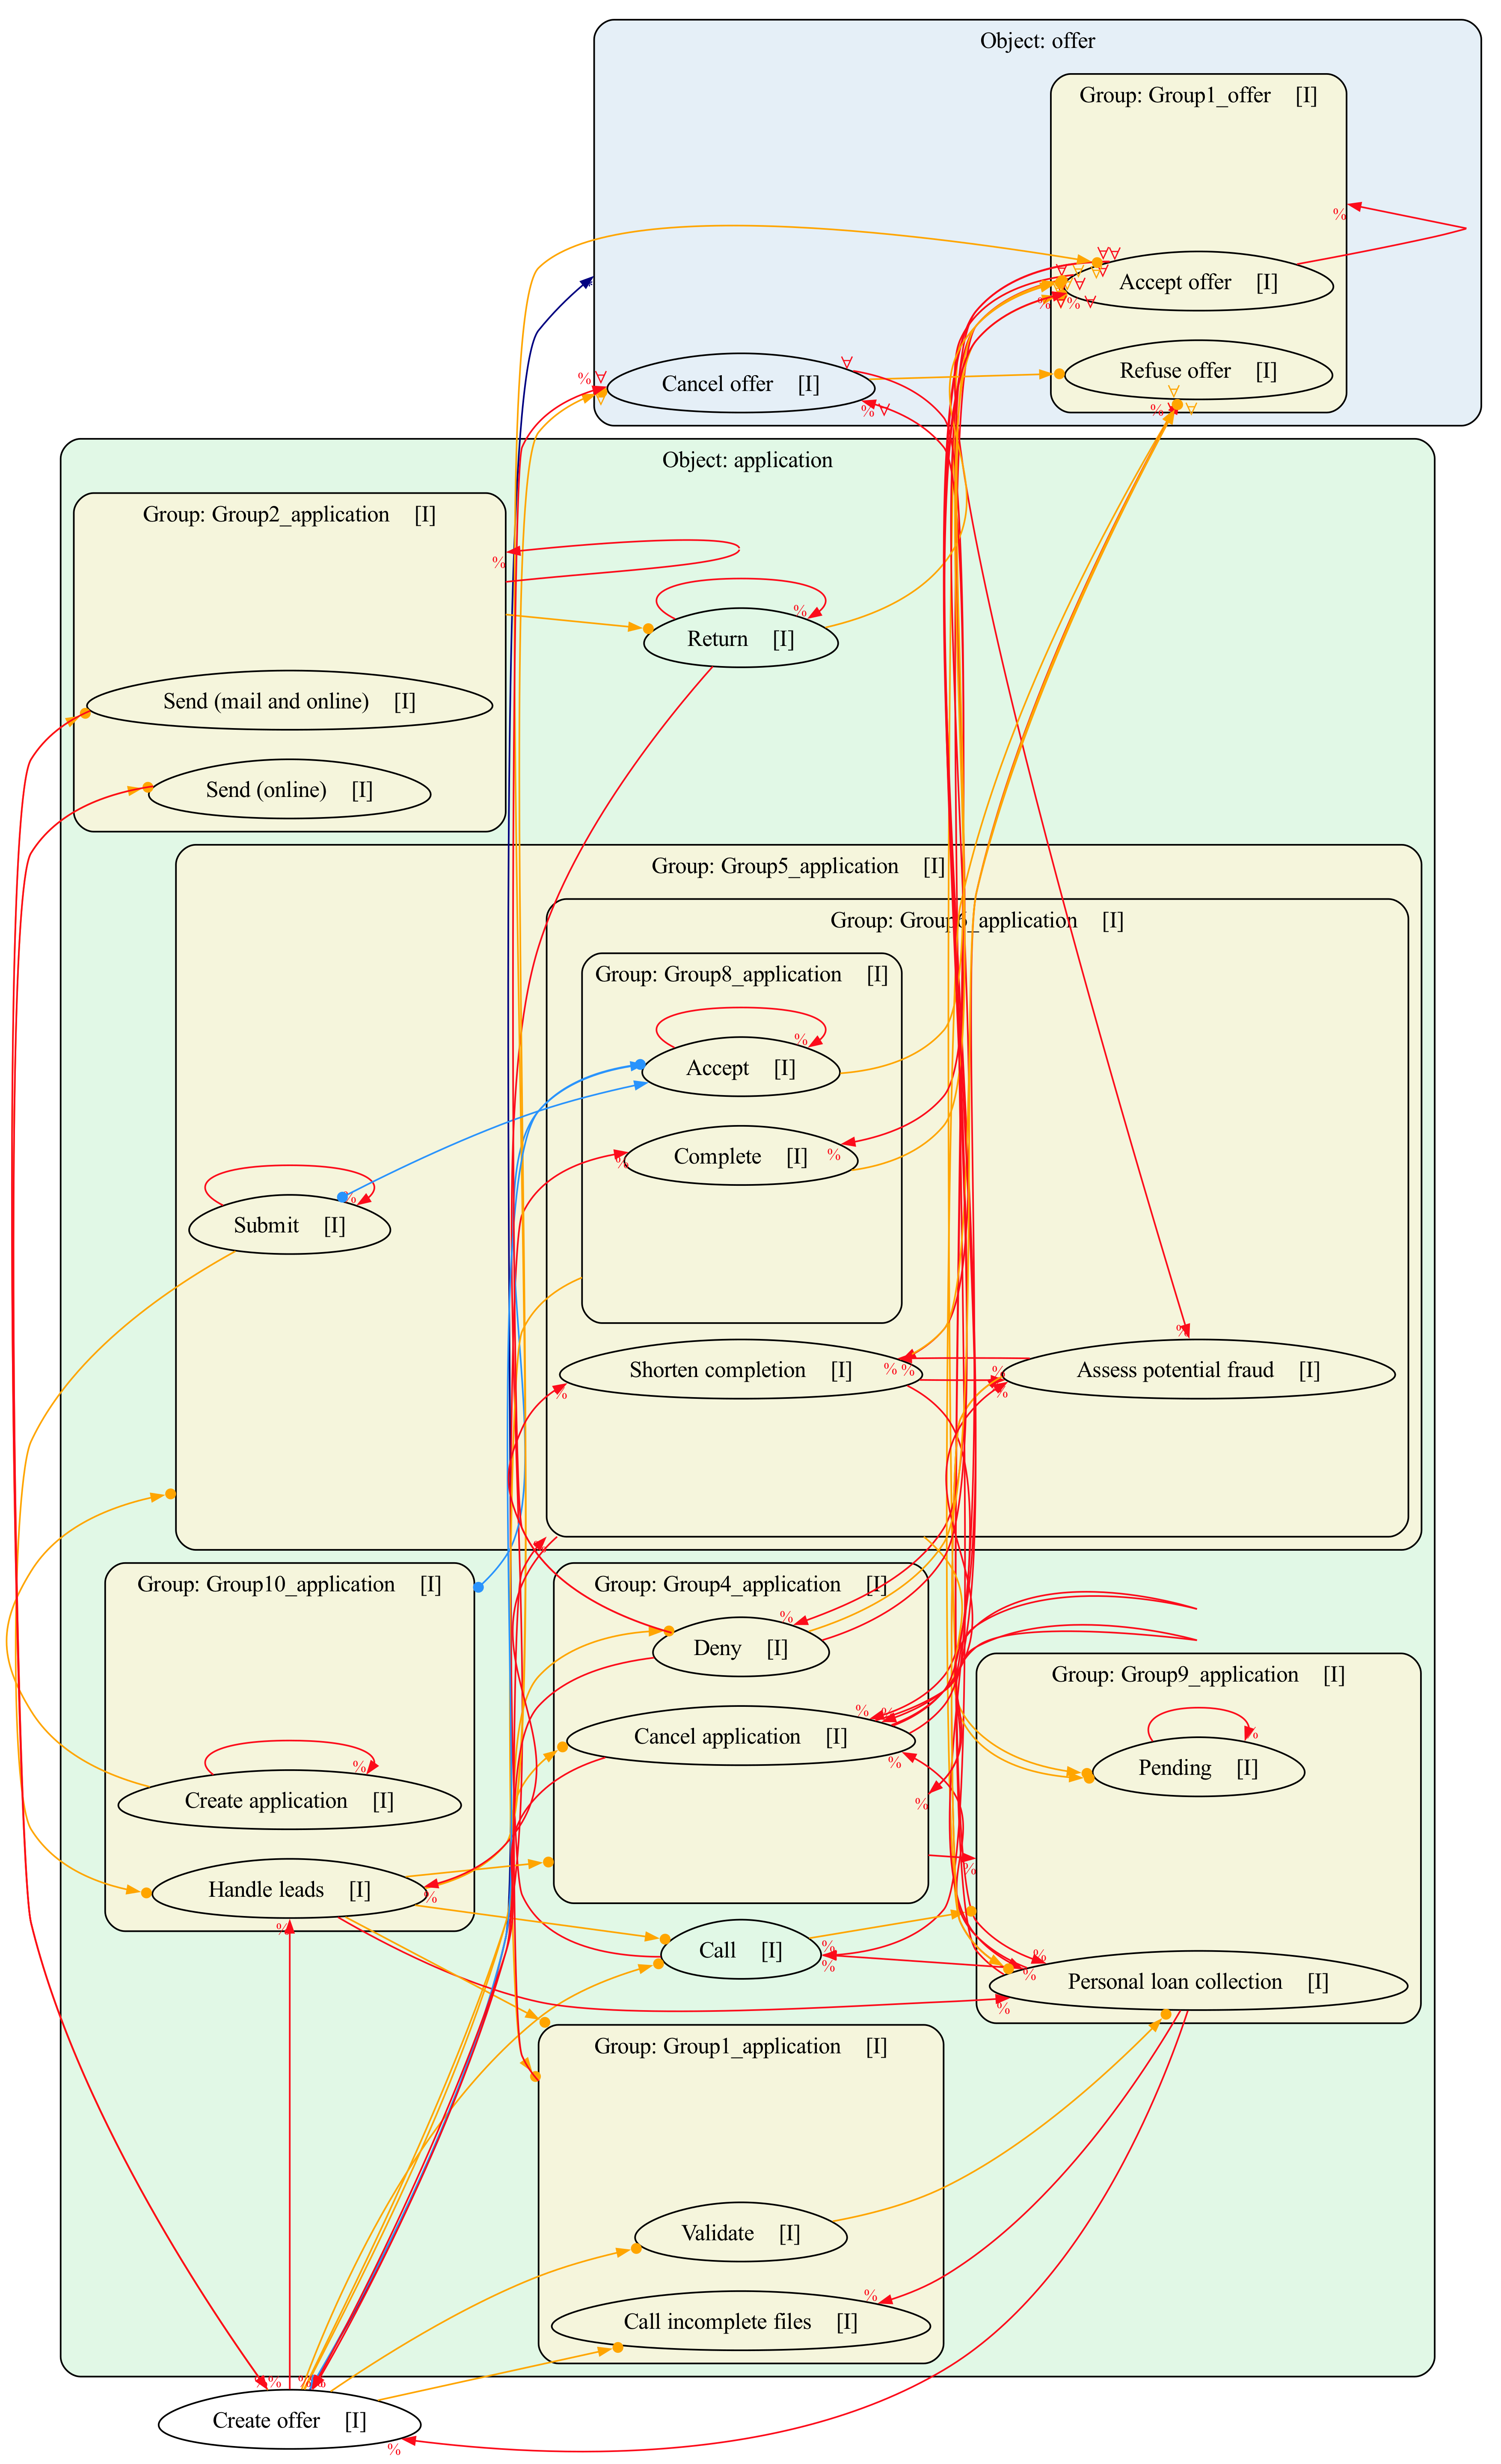

In [29]:
graph = apply(ocel=ocel_log,spawn_mapping=spawn_mapping,activities_mapping=activities_mapping, apply_nested=True)
dcr_viz.view(dcr_viz.apply(graph))